![aws](https://zeevector.com/wp-content/uploads/Aws-Logo-PNG-White.png)
# **Data Analysis: AWS SaaS Sales**

*Usamah Ibadurrahman JCDS-BDG 2024*

Analasis data ini dilakukan untuk memenuhi proyek tugas 'Capstone Modul: 2' dari program 

Job Connector Data Science Purwadhika School Bandung. 

### **Contents**

0. Import Labraries
1. Define Problem
2. Data Understanding & Cleaning
3. Data Analysis
4. Conclusion & Recommendation

## `Import Libraries`

In [296]:
#import library
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import shapiro, normaltest, kruskal

from datetime import datetime
import datetime

import plotly.express as px    
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

## `Define Problem`

### **1.1 Latar Belakang**

SaaS adalah singkatan dari Software-as-a-Service. Ini adalah model pengiriman/penjualan perangkat lunak di mana penyedia pihak ketiga menghosting aplikasi dan membuatnya tersedia untuk Customer melalui Internet. Customer dapat mengakses aplikasi tersebut melalui browser dan membayar langganan bulanan untuk penggunaannya. AWS menghasilkan pendapatan dari penjualan langganan perangkat lunak mereka kepada Customer mereka, yang mana sebagian besar aplikasi yang mereka jual dijual dengan model langganan bulanan.

Dengan memahami bagaimana pemberian diskon memengaruhi profitabilitas, mengetahui tren penjualan yang berhubungan dengan kinerja produk, serta mengidentifikasi kontribusi Customer dan pola penjualan berdasarkan wilayah, perusahaan dapat mengambil keputusan yang lebih tepat dalam mengalokasikan sumber daya, menyesuaikan strategi pemasaran, dan meningkatkan kepuasan Customer secara keseluruhan.


### **1.2 Pernyataan Masalah**

Sebuah perusahaan yang menyediakan perangkat lunak sebagai layanan (Software As A Service). Perusahaan ingin mengoptimalkan strategi penjualan, meningkatkan profitabilitas, dan memahami lebih baik kebutuhan dan preferensi Customer. Oleh karena itu, perusahaan ingin merekrut Data Analis agar dapat mendapatkan wawasan yang berharga untuk membantu kemajuan perusahaan tersebut. Adapun beberapa pernyataan masalah terkait analasis yang akan dilakukan:

1. Bagaimana penggunaan diskon dan pengaruhnya terhadap profitabilitas perusahaan?
    - Perbandingan Transaksi Menggunakan Diskon
    - Hubungan antara tingkat diskon dengan margin keuntungan, dan Identifikasi titik optimal 
    - Tren pemberian diskon titik optimal dengan diskon diatas titik optimal.
2. Bagaimana tren penjualan utama yang dapat diidentifikasi dari data historis?
    - Identifikasi tren dan pola penjualan dari data historis.
3. Bagaimana kontribusi Customer terhadap perusahaan?
    - Identifikasi kontribusi Customer.
    - Faktor yang mempengaruhi kontribusi Customer yang janggal.
4. Bagaimana kinerja produk terhadap penjualan antar wilayah geografis?
    - Identifikasi Kinerja Produk terhadap Profitabilitas Perusahaan berdasarkan Wilayah Geografis
    - Faktor yang mempengaruhi perbedaan keuntungan yang didapatkan dari produk yang unggul dan rugi

### **1.3 Tujuan**

Analisis ini dilakukan dengan tujuan untuk menjawab pernyataan masalah di atas, seperti:
1. **Pengaruh Diskon terhadap Profitabilitas:** Memahami dampak pemberian diskon terhadap profitabilitas perusahaan untuk mengoptimalkan strategi harga.
2. **Tren Penjualan:** Mengidentifikasi tren penjualan untuk memahami pola penjualan dan profit yang didapatkan perusahaan pertahunnya untuk meningkatkan strategi pemasaran kedepannya
3. **Kontribusi Customer terhadap Perusahaan:** Mengidentifikasi customer yang paling berharga dan memberikan kontribusi signifikan terhadap tingkat profitabiltas perusahaan 
4. **Kinerja Produk terhadap penjualan berdasarkan region:** Mengetahui apakah ada perbedaan dalam permintaan dan keuntungan produk di antara wilayah geografis yang berbeda.


## `Data Understanding & Cleaning`
### **2.1 Data Understanding**

Langkah pertama yang kita lakukan adalah memahami data dan melakukan data cleaning terhadap dataset untuk memaksimalkan proses analisis data

Data SaaS Sales yang digunakan bersumber dari [Kaggle](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales)

- **Gambaran Umum dari Dataset**

In [297]:
# Membaca dataset
df = pd.read_csv('SaaS-Sales.csv', parse_dates=['Order Date'])
df.to_csv('SaaS_Sales_Updated.csv', index=False)

# Deskripsi Umum Dataset
print("Dimensi dataset:", df.shape)
print("\nLima baris pertama dan lima baris terakhir dataset:")
display(df.head(), df.tail())

Dimensi dataset: (9994, 19)

Lima baris pertama dan lima baris terakhir dataset:


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,2023-05-05,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


- **Informasi kolom**

In [298]:
# mengubah dtypes kolom-kolom ID menjadi object
kolom_ID = ['Row ID', 'Date Key', 'Customer ID']
df[kolom_ID] = df[kolom_ID].astype('object')

print("Informasi kolom:")
df.info()

Informasi kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   object        
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   object        
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   object        
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 no

Kolom `kategorikal` terdiri dari:

| Nama Kolom      | Deskripsi                                         |
|-----------------|---------------------------------------------------|
| `Row ID`        | ID untuk tiap Transaksi                           |
| `Order ID`      | ID untuk tiap pemesanan.                          |
| `Order Date`    | Tanggal pemesanan.                                | 
| `Date Key`      | Representasi numerik dari tanggal pemesanan.      |
| `Contact Name`  | Nama pemesan.                                     | 
| `Country`       | Negara asal pemesanan.                            | 
| `City`          | Kota asal pemesanan.                              | 
| `Region`        | Region asal pemesanan.                            | 
| `Subregion`     | Subregion asal pemesanan.                         |
| `Customer`      | Nama perusahaan pemesan.                          |
| `Customer ID`   | ID perusahaan pemesan.                            | 
| `Industry`      | Industri perusahaan pemesan.                      |
| `Segment`       | Segmen industri perusahaan/Customer (Small-Medium Business, Strategic, Enterprise)               |
| `Product`       | Produk yang dipesan.                              |
| `License`       | Key lisensi produk yang dipesan.                  |
  
Kolom `numerikal` terdiri dari:

| Nama Kolom      | Deskripsi                                         |
|-----------------|---------------------------------------------------| 
| `Sales`         | Besar penjualan untuk transaksi ini.              |
| `Quantity`      | Jumlah produk yang dipesan di transaksi ini.      |
| `Discount`      | Diskon yang diberikan untuk transaksi ini.        |
| `Profit`        | Keuntungan dari transaksi ini.                    |

- Dataset ini terdiri dari 9994 baris dan 19 kolom, dimana tiap barisnya menampilkan data dari suatu pemesanan perangkat lunak dari pembeli
- `Order ID`, `Customer ID`, `License` Tidak digunakan untuk analisis, karena isinya hanya kode unik, oleh karena itu kita ubah data type nya menjadi 'object' agar memudahkan proses analisis kedepannya
- `Row ID` sama seperti index pada dataframe dan tidak relevan terhadap data dan analisis nantinya
- `Date Key` Dapat diabaikan, karena isinya hanya berupa bentuk representatif dari 'Order Date'
--------------------------------------------------------------------------------------------------------------------------------

- **Penambahan dan Pengurangan Feature**

    - Agar memudahkan proses pensortiran data berdasarkan periode, kita buat periode `Order Year` dan `Order Month` sebagai feature tambahan pada dataset.
    - lalu kita mendrop kolom `Row ID` dan `Date Key`, karena kedua kolom tersebut tidak berfungsi dalam analisis ini

In [299]:
# menambahkan kolom periode order berdasarkan tahun dan bulan
orderdate_index = df.columns.get_loc('Order Date')
df.insert(orderdate_index + 1, 'Order Year', df['Order Date'].dt.year)
df.insert(orderdate_index + 2, 'Order Month', df['Order Date'].dt.month_name())
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Order Month'] = pd.Categorical(df['Order Month'], categories=months_order, ordered=True)

# mendrop kolom 'Row ID' dan 'Date Key' 
df = df.drop(columns=['Row ID','Date Key'])

df.sample(5)

,Order ID,Order Date,Order Year,Order Month,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
3746,EMEA-2022-149979,2022-09-24,2022,September,Faith Jones,Finland,Helsinki,EMEA,NOR,Sony,1028,Tech,SMB,FinanceHub,KIJTBOYQPY,368.970,3,0.0,81.1734
1277,APJ-2022-148698,2022-05-03,2022,May,Jan Vaughan,Japan,Tokyo,APJ,JAPN,Chevron,1017,Energy,SMB,ChatBot Plugin,YG6LC4C404,86.352,3,0.2,5.3970
3302,EMEA-2020-159926,2020-11-18,2020,November,Colin Morgan,France,Paris,EMEA,EU-WEST,Boeing,1014,Manufacturing,SMB,SaaS Connector Pack,Z5OO08VTB7,60.312,3,0.2,5.2773
7434,AMER-2021-148180,2021-07-26,2021,July,Dominic Bell,United States,Denver,AMER,NAMER,Mitsubishi,1050,Manufacturing,Strategic,ContactMatcher,40TI89SZKI,9.144,3,0.2,3.0861
4484,AMER-2022-109365,2022-11-04,2022,November,Warren Hemmings,United States,New York City,AMER,NAMER,Prudential Financial,1078,Finance,SMB,ContactMatcher,FYQPHRKT7O,9.296,2,0.2,3.0212


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Order Year    9994 non-null   int32         
 3   Order Month   9994 non-null   category      
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   object        
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

- **Statistik Deskriptif untuk tiap Jenis Kolom**

In [301]:
print("Statistik deskriptif untuk kolom Numerikal dan kolom Kategorikal:")
display(df.describe(), df.describe(include='object'))

Statistik deskriptif untuk kolom Numerikal dan kolom Kategorikal:


,Order Date,Order Year,Sales,Quantity,Discount,Profit
count,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2022-05-01 00:07:12.259355648,2021.722934,229.858001,3.789574,0.156203,28.656896
min,2020-01-04 00:00:00,2020.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2021-05-23 00:00:00,2021.000000,17.280000,2.000000,0.000000,1.728750
50%,2022-06-27 00:00:00,2022.000000,54.490000,3.000000,0.200000,8.666500
75%,2023-05-15 00:00:00,2023.000000,209.940000,5.000000,0.200000,29.364000
max,2023-12-31 00:00:00,2023.000000,22638.480000,14.000000,0.800000,8399.976000
std,NaN,1.124039,623.245101,2.225110,0.206452,234.260108


,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,48,262,3,12,99,99,10,3,14,9994
top,EMEA-2023-100111,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,1080,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,37,2001,922,4219,2507,192,192,2127,5191,1842,1


- **Unique Values**

Melihat Unique Values pada dataset

In [302]:
tabelUV = pd.DataFrame({
        'column name': df.columns.values,
        'data_type': df.dtypes.values,
        'null': df.isna().mean().values * 100,
        'negative': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
        'n_unique': df.nunique().values,
        'sample_unique': [df[col].unique() for col in df.columns]
        })
tabelUV

,column name,data_type,null,negative,n_unique,sample_unique
0,Order ID,object,0.0,False,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
1,Order Date,datetime64[ns],0.0,False,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 202..."
2,Order Year,int32,0.0,False,4,"[2022, 2021, 2020, 2023]"
3,Order Month,category,0.0,False,12,"['November', 'June', 'October', 'April', 'Dece..."
4,Contact Name,object,0.0,False,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
5,Country,object,0.0,False,48,"[Ireland, United States, Germany, Sweden, Cana..."
6,City,object,0.0,False,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
7,Region,object,0.0,False,3,"[EMEA, AMER, APJ]"
8,Subregion,object,0.0,False,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
9,Customer,object,0.0,False,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."


- **Rentang waktu dataset**

In [303]:
# Data Datetime
print("\nRange data:")
for column in df.select_dtypes(include='datetime64').columns:
    print("\nKolom:", column)
    print("Rentang waktu data:", df[column].min(), "sampai", df[column].max())

for column in df.select_dtypes(include=['float', 'int']).columns:
    print("\nKolom:", column)
    print(f"Rentang data {column}:", df[column].min(), "sampai", df[column].max())


Range data:

Kolom: Order Date
Rentang waktu data: 2020-01-04 00:00:00 sampai 2023-12-31 00:00:00

Kolom: Order Year
Rentang data Order Year: 2020 sampai 2023

Kolom: Sales
Rentang data Sales: 0.444 sampai 22638.48

Kolom: Quantity
Rentang data Quantity: 1 sampai 14

Kolom: Discount
Rentang data Discount: 0.0 sampai 0.8

Kolom: Profit
Rentang data Profit: -6599.978 sampai 8399.976


Ini adalah beberapa informasi penting tentang dataset Perusahaan SaaS:

1. Terdapat 793 Contact Name dari pemesan (Customer)

2. Perusahaan memiliki 14 produk yang dijual ke pihak customer.

3. Customer Profile terdiri dari:
   - 3 Segmen,
   - 10 Industri,
   - 99 Customer.

4. Perusahaan memiliki jangkauan penjualan di:
   - 3 Region,
   - 12 Sub-Region,
   - 48 negara,
   - 262 kota.

Semua informasi ini memberikan gambaran lengkap tentang karakteristik dan cakupan dataset penjualan dari perusahaan.

-----

### **2.2 Data Cleaning**

- **Cek Missing dan Duplicated Values**

In [304]:
print('Missing values status:', df.isnull().values.any())
print('Duplicated Data:', df.duplicated().sum())
missing_values = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
missing_values['Percentage'] = (missing_values['Total Null Values'] / df.shape[0]) * 100
mv = missing_values.sort_values(by='Percentage', ascending=False).reset_index()
dup = df[df.duplicated(keep=False)]

display(mv, dup)

Missing values status: False
Duplicated Data: 0


,index,Total Null Values,Percentage
0,Order ID,0,0.0
1,Customer ID,0,0.0
2,Discount,0,0.0
3,Quantity,0,0.0
4,Sales,0,0.0
5,License,0,0.0
6,Product,0,0.0
7,Segment,0,0.0
8,Industry,0,0.0
9,Customer,0,0.0


,Order ID,Order Date,Order Year,Order Month,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


- Setelah melakukan pengecekan, ternyata pada dataset ini tidak terdapat Missing Values dan Duplicated Values
----------------------

- **Cek Normalitas Distribusi dan Data Outliers**

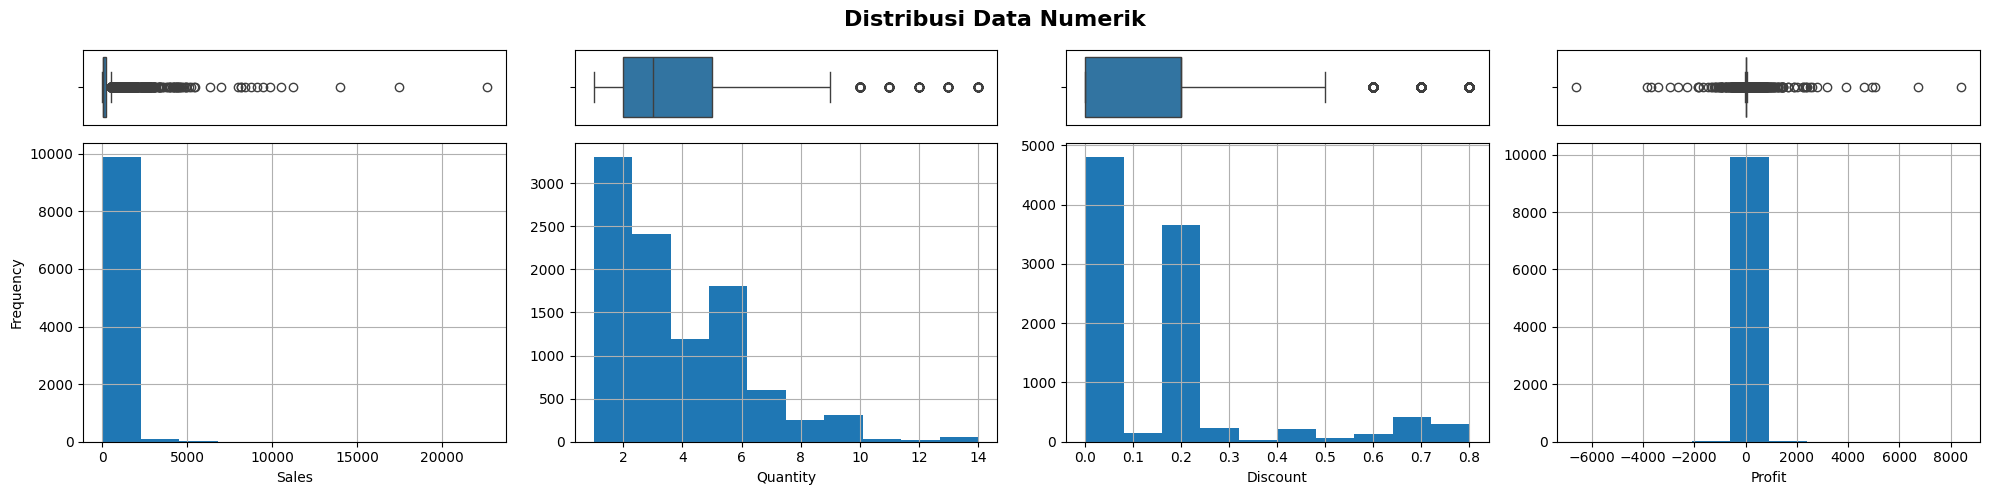

In [305]:
# Membuat subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 5), gridspec_kw={'height_ratios': [0.5, 2]})
axes = axes.flatten()  # Meratakan array 2D ke dalam 1D

# Data yang akan digunakan
data = [("Sales", "Sales"), ("Quantity", "Quantity"), ("Discount", "Discount"), ("Profit", "Profit")]

for i, (column, label) in enumerate(data):
    # Boxplot
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_xlabel("")  
    axes[i].set_xticks([])  
    
    # Histogram
    df[column].hist(ax=axes[i+4])
    axes[i+4].set_xlabel(label)  # Menambahkan label sumbu x
    if i == 0:
        axes[i+4].set_ylabel("Frequency")  # Menambahkan label sumbu y untuk histogram pertama

# Menambahkan judul
fig.suptitle("Distribusi Data Numerik", x=0.5, y=0.98, ha='center', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


In [306]:
from scipy.stats import normaltest
numerical = [var for var in df.columns if df[var].dtypes in ['float64', 'int64'] and var != 'Order Period']

dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(df[feature_name])
    
    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,Sales,18033.308498,0.0,Not Normally Distributed
1,Quantity,2148.018022,0.0,Not Normally Distributed
2,Discount,2977.822121,0.0,Not Normally Distributed
3,Profit,14363.736244,0.0,Not Normally Distributed


In [307]:
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(df, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(df[column]) * 100, 2)
    lower_bound = round(lower_bound, 2)
    upper_bound = round(upper_bound, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df


,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,Sales,1167,11.68,-271.71,498.93
1,Quantity,170,1.70,-2.50,9.50
2,Discount,856,8.57,-0.30,0.50
3,Profit,1881,18.82,-39.72,70.82


- Setelah melakukan uji normalitas distribusi, terbukti bahwa semua data numerik TIDAK terdistribusi normal 
- Pada data numerik terdapat banyak outliers. Namun dikarenakan data masih relevan, maka data tersebut tetap dapat berguna untuk proses analisis kedepannya
----

**Korelasi Data Numerik**

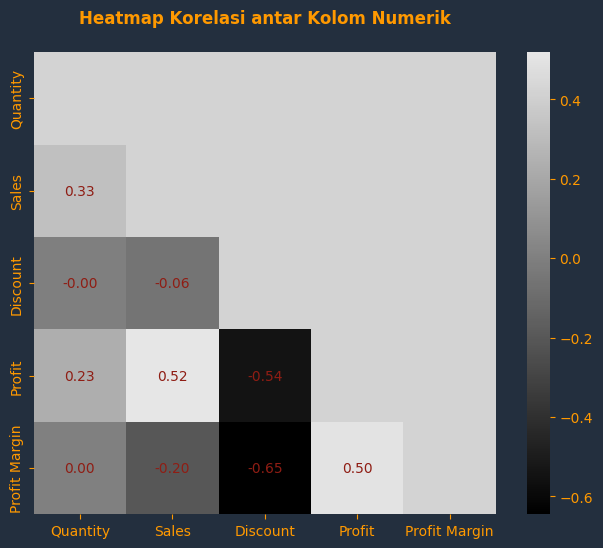

In [387]:
df_copy = df.copy()
df_copy['Profit Margin'] = (df_copy['Profit'] / df_copy['Sales']) * 100

numerical = ['Quantity', 'Sales', 'Discount', 'Profit', 'Profit Margin']

matrix = np.triu(df_copy[numerical].corr(method='spearman'))

plt.figure(figsize=(8, 6))
ax = sns.heatmap(data=df_copy[numerical].corr(method='spearman'), annot=True, fmt='.2f', cmap='gray', center=0, mask=matrix, square=True,annot_kws={'color': '#8F1D14'})
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='#FF9900')
for tick in cbar.ax.yaxis.get_ticklabels():
    tick.set_color('#FF9900')

plt.title('Heatmap Korelasi antar Kolom Numerik\n', ha='center', fontweight='bold', color='#FF9900')
ax.tick_params(axis='x', colors='#FF9900')
ax.tick_params(axis='y', colors='#FF9900')
ax.set_facecolor('lightgrey')
plt.gcf().set_facecolor('#232F3E')
plt.show()

Uji korelasi di atas menunjukan bahwa terdapat ukuran korelasi antar kolom numerik, seperti:
| Korelasi         | Keterangan                                           |
| ---------------- | ---------------------------------------------------- |
| `Sales` - `Quantity` | Korelasi positif moderat (0.33), menunjukkan semakin tinggi penjualan, semakin banyak barang yang terjual |
| `Sales` - `Discount` | Korelasi mendekati nol (-0.06), tidak ada hubungan linier yang jelas antara penjualan dan diskon |
| `Sales` - `Profit` | Korelasi positif kuat (0.52), semakin tinggi penjualan, semakin besar keuntungan |
| `Sales` - `Profit Margin` | Korelasi negatif lemah (-0.2), menunjukkan bahwa peningkatan profit margin cenderung berkorelasi dengan penurunan penjualan, dan sebaliknya, tetapi hubungan ini tidak kuat |
| `Quantity` - `Profit` | Korelasi positif rendah (0.23), semakin banyak barang yang terjual, semakin besar keuntungan |
| `Quantity` - `Discount` | Korelasi mendekati nol (-0.00), tidak ada hubungan linier antara jumlah barang yang terjual dan diskon |
| `Quantity` - `Profit Margin` | Korelasi sangat lemah (0.0), menunjukkan tidak adanya hubungan linier antara profit margin dan jumlah penjualan |
| `Discount` - `Profit Margin` | Korelasi negatif sedang (-0.65), semakin rendah diskon yang diberikan, dan sebaliknya |
| `Discount` - `Profit` | Korelasi negatif kuat (-0.54), semakin besar diskon, semakin kecil keuntungan, dan sebaliknya |
| `Profit` - `Profit Margin` | Korelasi positif sedang (0.5), semakin tinggi profit margin, semakin tinggi keuntungan yang diperoleh |

----
**Menyimpan dataset terupdate**

In [309]:
df.to_csv('SaaSSales_Clean.csv', index=False)

## `Data Analytics`

Kali ini kita akan melakukan analisis permasalahan yang terdapat pada SaaS Sales ini dari beberapa aspek, yaitu:
1. **Pengaruh Diskon terhadap Profitabilitas**
2. **Tren Penjualan dan Kinerja Produk**
3. **Kontribusi Customer terhadap Kinerja Perusahaan dan Penjualan berdasarkan Wilayah Geografis** 

## **3.1 `Bagaimana Penggunaan Diskon dan Pengaruhnya terhadap Profitabilitas Perusahaan?`**

### **a. Perbandingan Transaksi Menggunakan Diskon**

In [311]:
transactions_with_discount = df[df['Discount'] > 0]
transactions_without_discount = df[df['Discount'] == 0]

num_transactions_with_discount = len(transactions_with_discount)
num_transactions_without_discount = len(transactions_without_discount)
median_profit_with_discount = transactions_with_discount['Profit'].median()
median_profit_without_discount = transactions_without_discount['Profit'].median()

data = {
    'Type of Transaction': ['With Discount', 'Without Discount'],
    'Number of Transactions': [num_transactions_with_discount, num_transactions_without_discount],
    'Median Profit': [round(median_profit_with_discount, 2), round(median_profit_without_discount, 2)]
}

df_discount = pd.DataFrame(data)
df_discount

,Type of Transaction,Number of Transactions,Median Profit
0,With Discount,5196,3.34
1,Without Discount,4798,16.00


**INSIGHT**

- **Jumlah Transaksi**: Terdapat 5196 transaksi dengan diskon dan 4798 transaksi tanpa diskon. Jumlah transaksi dengan diskon lebih tinggi dibandingkan dengan transaksi tanpa diskon.
- **Median Profit**: Median profit dari transaksi tanpa diskon (16.00) jauh lebih tinggi dibandingkan dengan transaksi dengan diskon (3.34). Hal ini menunjukkan bahwa meskipun jumlah transaksi dengan diskon lebih tinggi, namun profitabilitas per transaksi tanpa diskon cenderung lebih tinggi.

### **b. Identifikasi Titik Optimal Diskon**

Identifikasi titik optimal dalam memberikan diskon untuk meningkatkan profitabilitas tanpa mengorbankan margin keuntungan yang signifikan

In [312]:
order_by_discount = df.groupby('Discount')['Order ID'].count().sort_values(ascending=False)
sales_by_discount = df.groupby('Discount')['Sales'].sum().round(2).sort_values(ascending=False)
profit_by_discount = df.groupby('Discount')['Profit'].sum().round(2).sort_values(ascending=False)
pm_by_discount = ((profit_by_discount / sales_by_discount) * 100).round(2).sort_values(ascending=False)

discount_analysis = pd.DataFrame({
    'Number of Transaction': order_by_discount,
    'Sales': sales_by_discount,
    'Profit': profit_by_discount,
    'Profit Margin (%)': pm_by_discount
})

display(discount_analysis)

,Number of Transaction,Sales,Profit,Profit Margin (%)
Discount,,,,
0.00,4798,1087908.47,320987.60,29.51
0.10,94,54369.35,9029.18,16.61
0.15,52,27558.52,1418.99,5.15
0.20,3657,764594.37,90337.31,11.82
0.30,227,103226.66,-10369.28,-10.05
0.32,27,14493.46,-2391.14,-16.50
0.40,206,116417.78,-23057.05,-19.81
0.45,11,5484.97,-2493.11,-45.45
0.50,66,58918.54,-20506.43,-34.80


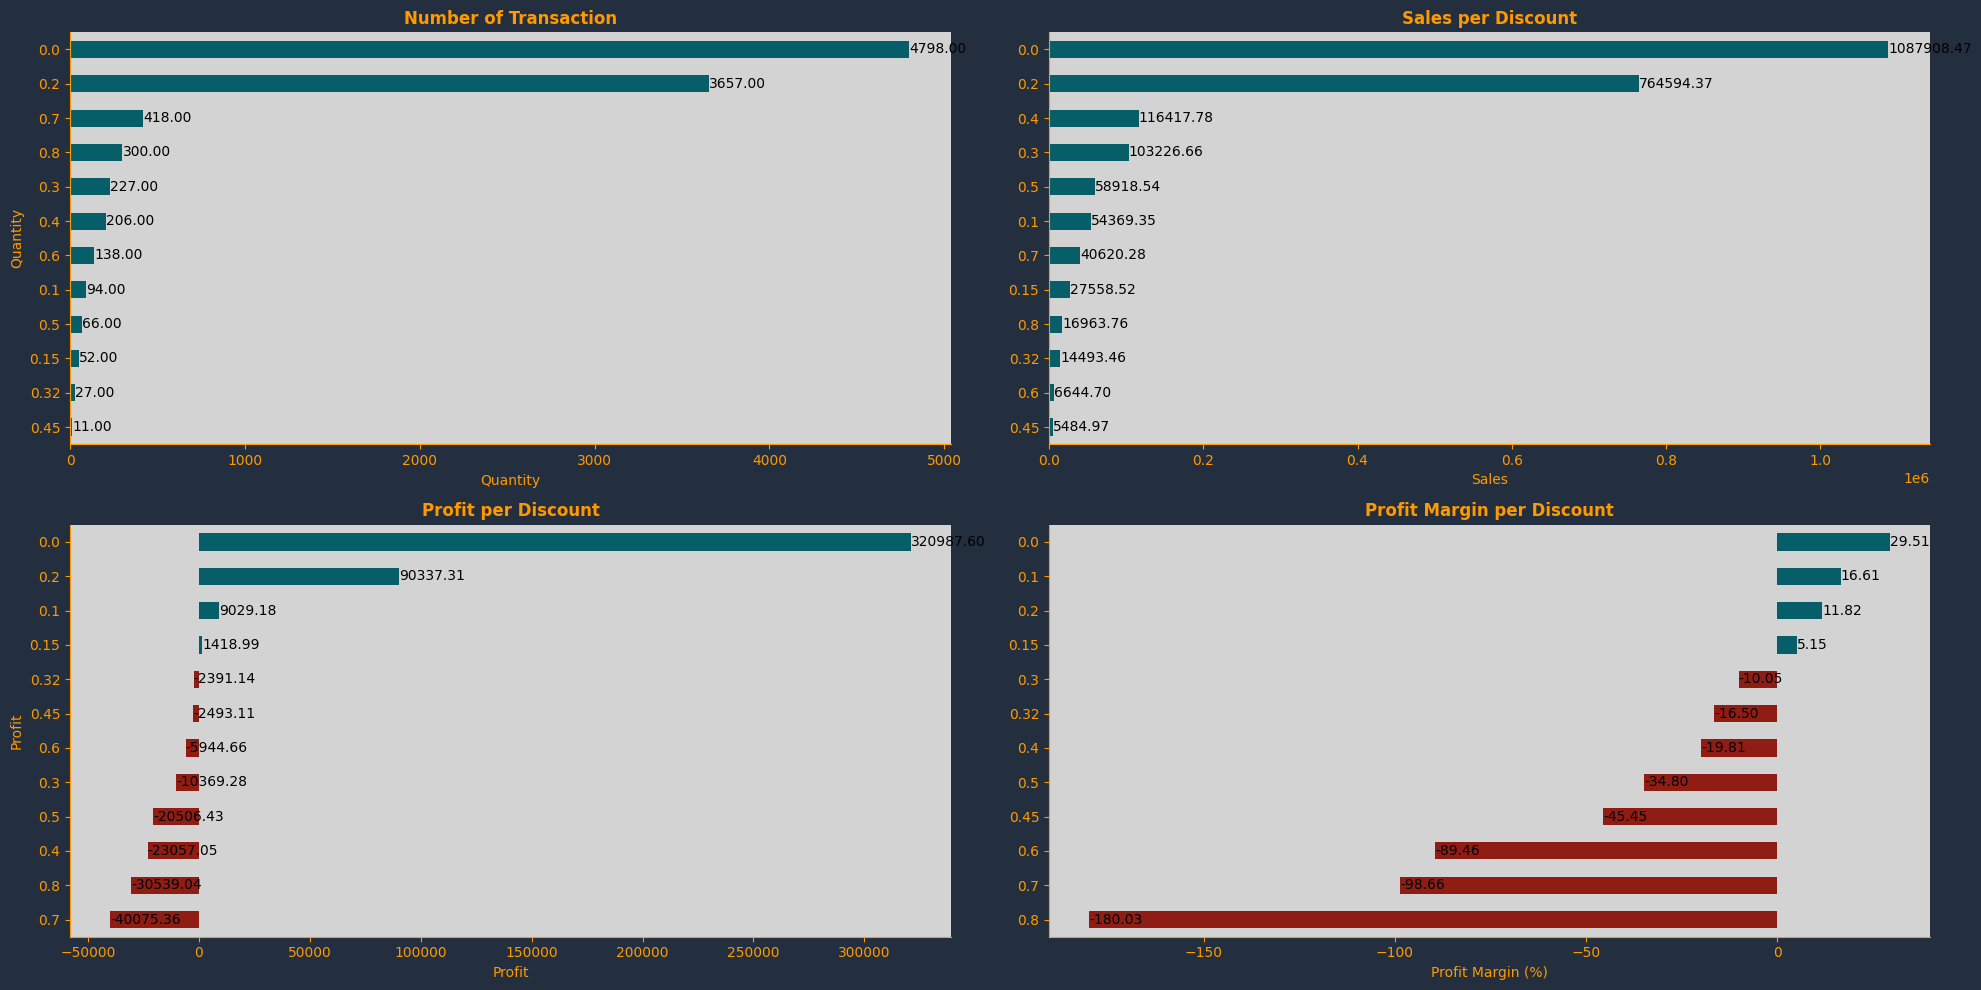

In [388]:
def plot_barh(plots, figsize=(18, 12)):
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=figsize)

    for i, (data, title, xlabel) in enumerate(plots):
        row = i // 2
        col = i % 2  

        # Menentukan warna berdasarkan nilai positif atau negatif
        color = ['#055E68' if val >= 0 else '#8F1D14' for val in data]

        data.plot(kind='barh', ax=axs[row, col], color=color)
        axs[row, col].set_title(title, fontweight='bold', color='#FF9900')
        axs[row, col].set_xlabel(xlabel, color='#FF9900')
        axs[row, col].set_ylabel(xlabel, color='#FF9900')
        axs[row, col].tick_params(axis='x', colors='#FF9900')
        axs[row, col].tick_params(axis='y', colors='#FF9900')
        axs[row, col].invert_yaxis()
        axs[row, col].set_facecolor('lightgrey')

        if col > 0:
            axs[row, col].set_ylabel(None)

        for j, v in enumerate(data):
            axs[row, col].text(v, j, f'{v:.2f}', va='center')

        axs[row, col].spines[['bottom','left']].set_color('#FF9900')
        axs[row, col].spines[['top','right']].set_visible(False)
    
        
    fig.patch.set_facecolor('#232F3E')
    plt.tight_layout()
    plt.show()

plots = [
    (order_by_discount, 'Number of Transaction', 'Quantity'),
    (sales_by_discount, 'Sales per Discount', 'Sales'),
    (profit_by_discount, 'Profit per Discount', 'Profit'),
    (pm_by_discount, 'Profit Margin per Discount', 'Profit Margin (%)')
]

plot_barh(plots, figsize=(20, 10))

In [314]:
df[df['Discount']<=0.2]['Order ID'].count(), df[df['Discount']>0.2]['Order ID'].count()

(8601, 1393)

**INSIGHT**
    
- Dari total transaksi (9994) perusahaan hanya memberikan diskon diatas 20% kepada 1391 transaksi (14% dari total transaksi), dapat diartikan strategi yang dilakukan oleh perusahaan dalam pemberian diskon cukup baik untuk tetap menghasilkan profitabilitas
- Penjualan (Sales) meningkat seiring dengan peningkatan tingkat diskon hingga mencapai diskon 20%, tetapi kemudian menurun secara signifikan saat diskon ditingkatkan lebih lanjut.
- Profit meningkat pada tingkat diskon rendah (10% dan 20%), tetapi mulai mengalami kerugian pada diskon yang lebih tinggi (30% - 80%). Hal ini menunjukkan adanya trade-off antara peningkatan penjualan dan pengurangan profitabilitas saat diskon ditingkatkan.
- Profit margin mengalami penurunan secara signifikan seiring dengan peningkatan tingkat diskon. Hal ini menunjukkan bahwa diskon yang lebih tinggi memberikan dampak negatif pada profitabilitas perusahaan. Diskon dengan tingkat yang sangat tinggi (misalnya, 70%, 80%) dapat berdampak negatif pada profitabilitas perusahaan. Oleh karena itu, perusahaan perlu hati-hati dalam menentukan strategi diskon agar tidak mengurangi keuntungan secara signifikan.
- Perusahaan perlu memperhatikan titik optimal dalam memberikan diskon. Terlalu banyak memberikan diskon dapat merugikan profitabilitas perusahaan, sementara terlalu sedikit diskon dapat mengurangi daya tarik penjualan. Analisis lebih lanjut diperlukan untuk menentukan titik optimal dalam memberikan diskon.

    Dengan demikian, analisis ini menunjukkan bahwa pemberian diskon dapat memiliki dampak yang signifikan terhadap profitabilitas perusahaan jika angka diskon berada diatas titik optimal, titik diskon optimal berada di <= 20% sebagai angka diskon yang aman agar profit margin yang dihasilkan tetap bernilai positif, dengan diskon yang lebih besar memiliki resiko yang berdampak menghasilkan penurunan profit margin atau bahkan kerugian. Dengan memahami pola diskon dan dampaknya terhadap profitabilitas, perusahaan dapat mengoptimalkan strategi harga dan diskon untuk mencapai keseimbangan yang baik antara peningkatan penjualan dan profitabilitas.

### **c. Tren Pemberian Diskon dibawah Titik Optimal dengan diatas Titik Optimal**

In [315]:
df_below_20 = df[df['Discount'] <= 0.2]
df_above_20 = df[df['Discount'] > 0.2]


pivot_below_20 = df_below_20.pivot_table(index='Order Month', columns='Order Year', values='License', aggfunc='nunique')
pivot_below_20.columns = pd.MultiIndex.from_product([['Total Transactions Below 20%'], pivot_below_20.columns])

# Buat pivot table untuk transaksi di atas 20%
pivot_above_20 = df_above_20.pivot_table(index='Order Month', columns='Order Year', values='License', aggfunc='nunique')
pivot_above_20.columns = pd.MultiIndex.from_product([['Total Transactions Above 20%'], pivot_above_20.columns])

# Gabungkan kedua pivot table
pivot_combined = pd.concat([pivot_below_20, pivot_above_20], axis=1)

# Tambahkan baris total keseluruhan
pivot_combined.loc['Total'] = pivot_combined.sum()

pivot_combined


Total Transactions Below 20%                    \
Order Year                          2020  2021  2022  2023   
Order Month                                                  
January                               68    42    80   138   
February                              40    56    74    86   
March                                133   121   125   201   
April                                123   134   150   164   
May                                  102   126   185   221   
June                                 112   121   174   200   
July                                 123   116   172   193   
August                               139   137   149   198   
September                            227   254   314   412   
October                              141   145   163   254   
November                             273   274   320   383   
December                             230   283   311   414   
Total                               1711  1809  2217  2864   

            Total Transactions Above 20%                 
Order Year                          2020 2021 2022 2023  
Order Month                                              
January                               10   16    9   24  
February                               7    8    8   19  
March                                 24   17   36   26  
April                                 12   26   20   34  
May                                   20   20   37   39  
June                                  23   17   28   34  
July                                  20   24   27   33  
August                                14   22   31   20  
September                             41   39   48   51  
October                               18   21   27   48  
November                              45   50   53   64  
December                              48   33   39   63  
Total                                282  293  363  455

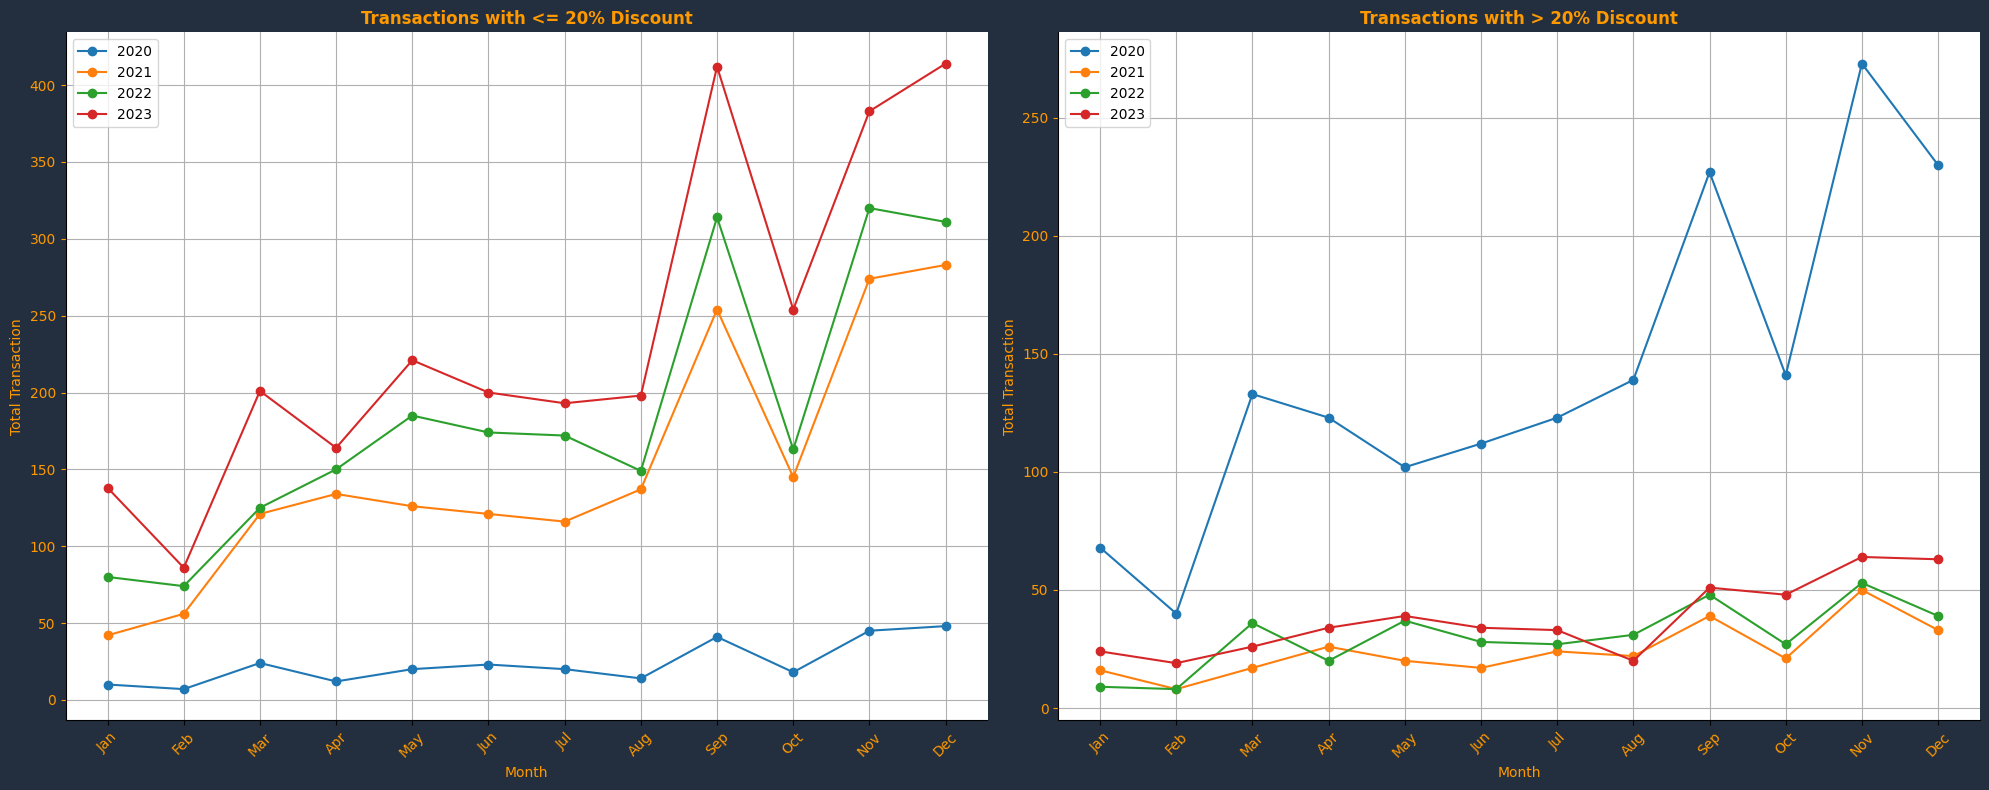

In [316]:
years = [2020, 2021, 2022, 2023]

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

for i, year in enumerate(years):
    df_year_below_20 = df_below_20[df_below_20['Order Year'] == year]
    df_year_above_20 = df_above_20[df_above_20['Order Year'] == year]
    
    licenses_below_20 = df_year_below_20.groupby('Order Month')['License'].nunique()
    licenses_above_20 = df_year_above_20.groupby('Order Month')['License'].nunique()
    
    ax = axs[1] if i == 0 else axs[0] 
    
    ax.plot(licenses_below_20.index, licenses_below_20.values, label=f'{year}', marker='o')
    
    ax = axs[0] if i == 0 else axs[1]
    ax.plot(licenses_above_20.index, licenses_above_20.values, label=f'{year}', marker='o')

for ax in axs:
    ax.set_title(('Transactions with <= 20% Discount' if ax == axs[0] else 'Transactions with > 20% Discount'), fontweight='bold', color='#FF9900')
    ax.set_xlabel('Month', color='#FF9900')
    ax.set_ylabel('Total Transaction', color='#FF9900')
    ax.set_xticks(np.arange(len(licenses_below_20)))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45, color='#FF9900')
    ax.tick_params(axis='y', colors='#FF9900')
    ax.legend()
    ax.grid(True)
    ax.spines[['top','right']].set_visible(False)

fig.patch.set_facecolor('#232F3E')
plt.tight_layout()
plt.show()

**INSIGHT**

- Jumlah total transaksi cenderung meningkat dari tahun ke tahun, baik untuk transaksi dengan diskon di bawah 20% maupun di atas 20%. Hal ini menunjukkan pertumbuhan bisnis yang positif dari tahun ke tahun.
- Meskipun jumlah transaksi meningkat dari tahun ke tahun, proporsi transaksi dengan diskon di bawah 20% terhadap transaksi dengan diskon di atas 20% tetap relatif stabil atau bahkan menurun. Ini menunjukkan bahwa meskipun ada pertumbuhan bisnis, perusahaan mungkin lebih memilih untuk memberikan diskon yang lebih kecil.
- Terlihat bahwa bulan September hingga November adalah bulan-bulan dengan jumlah transaksi yang signifikan. Hal ini mungkin disebabkan oleh musim liburan atau akhir tahun, di mana konsumen cenderung melakukan lebih banyak pembelian.
- Jumlah transaksi dengan diskon di bawah 20% umumnya lebih tinggi dibandingkan dengan diskon di atas 20% pada setiap bulan dan tahun. Namun, perbedaannya bisa berkurang atau bahkan terbalik pada beberapa bulan tertentu.
- Pada tahun-tahun terakhir, terutama pada tahun 2022 dan 2023, terlihat peningkatan signifikan dalam jumlah total transaksi, terutama untuk transaksi dengan diskon di bawah 20%. Hal ini menunjukkan adanya potensi pertumbuhan yang positif dalam segmen transaksi tersebut.

    Dengan menganalisis tren ini, perusahaan dapat menyesuaikan pemberian diskon dengan tingka optimal pada setiap transaksi dan merencanakan strategi penjualan yang lebih efektif untuk meningkatkan profitabilitas dan pertumbuhan bisnis.

## **3.2 `Bagaimana Tren Penjualan yang dapat Diidentifikasi dari Data Historis Perusahaan?`**

### **a. Analisis Tren Penjualan dan Profit per Tahun**

In [317]:
yearly_sales_profit = df.groupby(df['Order Year']).agg({'Sales':'sum', 'Profit':'sum'}).round(2)

display(yearly_sales_profit)

,Sales,Profit
Order Year,,
2020,484247.50,49543.97
2021,470532.51,61618.60
2022,608473.83,81726.93
2023,733947.02,93507.51


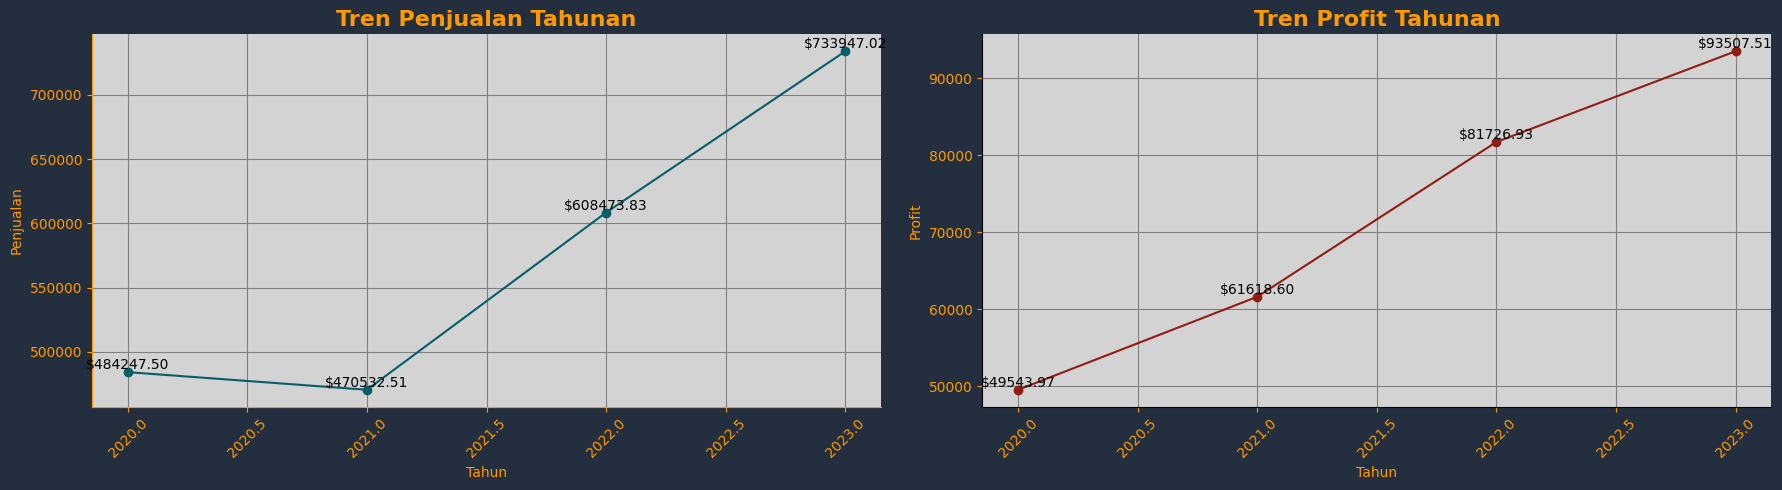

In [318]:
yearly_sales_profit = df.groupby(df['Order Year']).agg({'Sales':'sum', 'Profit':'sum'})

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

axs[0].plot(yearly_sales_profit.index, yearly_sales_profit['Sales'], marker='o', color='#055E68')
axs[0].set_title('Tren Penjualan Tahunan', fontsize=16, fontweight='bold', color='#FF9900')
axs[0].set_xlabel('Tahun', color='#FF9900' )
axs[0].set_ylabel('Penjualan', color='#FF9900')
axs[0].tick_params(axis='x', rotation=45, colors='#FF9900')
axs[0].tick_params(axis='y', colors='#FF9900')
axs[0].spines[['bottom','left']].set_color('#FF9900')
axs[0].spines[['top','right']].set_visible(False)
axs[0].grid(True, color='grey')
axs[0].set_facecolor('lightgrey')

for i, sales in enumerate(yearly_sales_profit['Sales']):
    axs[0].text(yearly_sales_profit.index[i], sales, f'${sales:.2f}', ha='center', va='bottom')

axs[1].plot(yearly_sales_profit.index, yearly_sales_profit['Profit'], marker='o', color='#8F1D14')
axs[1].set_title('Tren Profit Tahunan', fontsize=16, fontweight='bold', color='#FF9900')
axs[1].set_xlabel('Tahun', color='#FF9900')
axs[1].set_ylabel('Profit', color='#FF9900')
axs[1].tick_params(axis='x', rotation=45, colors='#FF9900')
axs[1].tick_params(axis='y', colors='#FF9900')
axs[1].spines[['top','right']].set_visible(False)
axs[1].grid(True, color='grey')
axs[1].set_facecolor('lightgrey')

for i, profit in enumerate(yearly_sales_profit['Profit']):
    axs[1].text(yearly_sales_profit.index[i], profit, f'${profit:.2f}', ha='center', va='bottom')

fig.patch.set_facecolor('#232F3E')
plt.tight_layout()
plt.show()


> **Uji Signifikansi**

In [319]:
yearly_sales = df.groupby(df['Order Year'])['Sales'].median()
yearly_profit = df.groupby(df['Order Year'])['Profit'].median()
yearly_profitmargin = ((yearly_profit / yearly_sales)*100).round(2) 

stats_sales, p_value_sales = kruskal(*[group for name, group in yearly_sales.groupby(level=0)])
stats_profit, p_value_profit = kruskal(*[group for name, group in yearly_profit.groupby(level=0)])

print("Hasil Uji Kruskal-Wallis untuk Sales Tahunan:")
print(f"Statistik Uji: {stats_sales}")
print(f"P-Value: {p_value_sales}")
if p_value_sales < 0.05:
    print("Terdapat perbedaan yang signifikan dalam penjualan antar tahun.")
else:
    print("Tidak terdapat perbedaan yang signifikan dalam penjualan antar tahun.")
print()

print("Hasil Uji Kruskal-Wallis untuk Profit Tahunan:")
print(f"Statistik Uji: {stats_profit}")
print(f"P-Value: {p_value_profit}")
if p_value_profit < 0.05:
    print("Terdapat perbedaan yang signifikan dalam profit antar tahun.")
else:
    print("Tidak terdapat perbedaan yang signifikan dalam profit antar tahun.")


Hasil Uji Kruskal-Wallis untuk Sales Tahunan:
Statistik Uji: 3.0
P-Value: 0.3916251762710877
Tidak terdapat perbedaan yang signifikan dalam penjualan antar tahun.

Hasil Uji Kruskal-Wallis untuk Profit Tahunan:
Statistik Uji: 3.0
P-Value: 0.3916251762710877
Tidak terdapat perbedaan yang signifikan dalam profit antar tahun.


**INSIGHT**

- Kedua grafik menunjukan kenaikan di setiap tahunnya, walaupun pada tren Penjualan (sales) sempat terjadi sedikit penurunan pada tahun 2020-2021,
- Pada Tren Penjualan (sales) tahunan 2020-2021 terjadi penurunan, dengan asumsi pada saat itu sedang terjadi fenomena Covid 19 yang berdampak pada perusahaan, seperti: 
    - beberapa organisasi mungkin menunda pengeluaran teknologi baru atau pembaruan perangkat lunak karena ketidakpastian ekonomi yang disebabkan oleh pandemi.
    - Beberapa industri, seperti perhotelan, pariwisata, dan ritel fisik, mengalami penurunan permintaan untuk solusi perangkat lunak karena penurunan aktivitas bisnis.
- Tidak adanya penurunan pada tren profit tahunan, membuktikan bahwa pada tahun 2021 perusahaan tetap menghasilkan profit yang tinggi dengan penjualan yang lebih rendah dari tahun sebelumnya (2020).
- Pada tahun 2020-2021 terjadi penurunan penjualan yang tidak terlalu signifikan, dibuktikan dengan uji signifikansi bahwa tidak terdapat perbedaan yang signifikan dalam penjualan maupun profit antar tahun

### **b. Analisis Tren Penjualan dan Profit per Bulan**

In [320]:
yearly_monthly_data = df.groupby(['Order Year', 'Order Month']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Pivot tabel untuk menata data ke dalam format yang diinginkan
pivot_table_sales = yearly_monthly_data.pivot(index='Order Month', columns='Order Year', values='Sales').applymap('{:.2f}'.format)
pivot_table_profit = yearly_monthly_data.pivot(index='Order Month', columns='Order Year', values='Profit').applymap('{:.2f}'.format)

combined_table = pd.concat([pivot_table_sales, pivot_table_profit], axis=1, keys=['Sales', 'Profit'])
combined_table

Sales                                  Profit            \
Order Year       2020      2021      2022       2023     2020      2021   
Order Month                                                               
January      13946.23  18174.08  18542.49   44703.14  2446.77  -3281.01   
February      4810.56  11951.41  22867.71   20283.51   865.73   2813.85   
March        55691.01  38726.25  51186.22   53908.96   498.73   9732.10   
April        28295.35  34195.21  39248.59   40112.42  3488.84   4187.50   
May          23648.29  30131.69  56691.08   45651.24  2738.71   4667.87   
June         34595.13  24797.29  39430.44   48259.75  4976.52   3335.56   
July         33946.39  28765.33  38440.75   48428.36  -841.48   3288.65   
August       27909.47  36898.33  33265.56   61516.09  5318.10   5355.81   
September    81777.35  64595.92  72908.11   90488.72  8328.10   8209.16   
October      31453.39  31404.92  56463.13   77793.76  3448.26   2817.37   
November     78628.72  75972.56  82192.32  112326.47  9292.13  12474.79   
December     69545.62  74919.52  97237.42   90474.60  8983.57   8016.97   

                                 
Order Year       2022      2023  
Order Month                      
January       2824.82   7208.68  
February      4996.25   1605.65  
March         3625.27  12957.90  
April         2957.84   2803.63  
May           8627.48   6274.46  
June          4499.58   8087.67  
July          4464.66   6623.56  
August        2328.35   8894.45  
September     9360.49  11395.44  
October      15763.38   9440.66  
November      4376.07   9682.55  
December     17902.73   8532.87

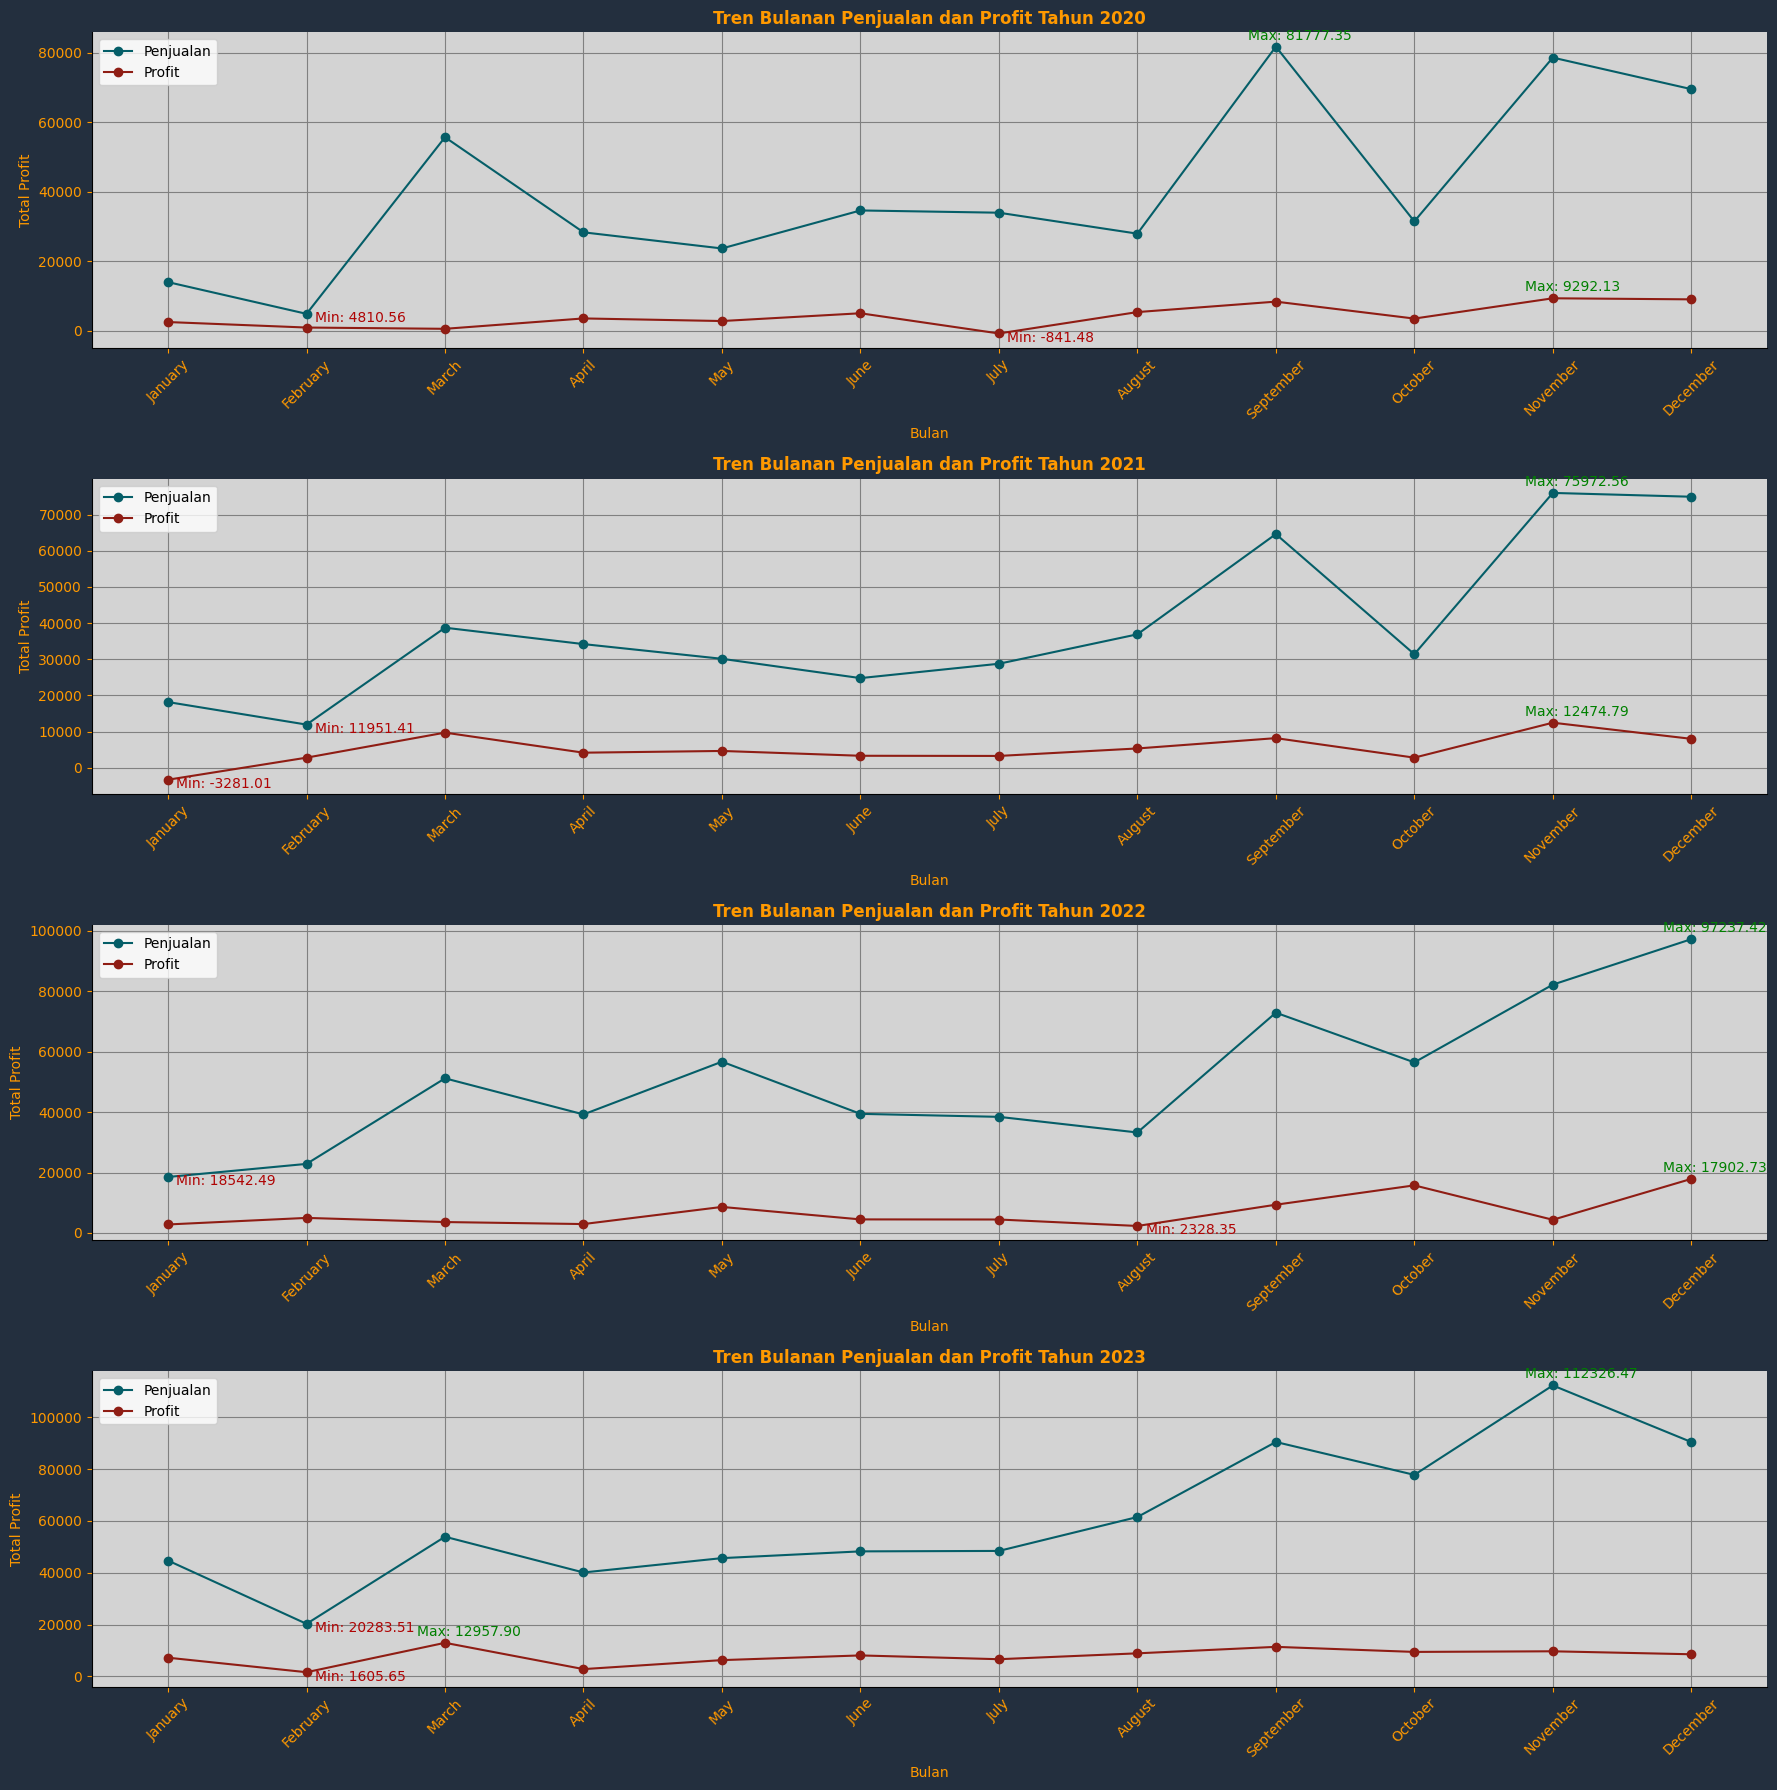

In [321]:
def annotate_max_min(ax, data, xcol, ycol):
    max_data = data.loc[data[ycol].idxmax()]
    min_data = data.loc[data[ycol].idxmin()]
    ax.annotate(f'Max: {max_data[ycol]:.2f}', xy=(max_data[xcol], max_data[ycol]), xytext=(-20, 5), textcoords='offset points', color='green')
    ax.annotate(f'Min: {min_data[ycol]:.2f}', xy=(min_data[xcol], min_data[ycol]), xytext=(6, -6), textcoords='offset points',color='#AF0404')

yearly_monthly_data = df.groupby(['Order Year', 'Order Month']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(18, 18))


for i, year in enumerate(range(2020, 2024)):
    yearly_data = yearly_monthly_data[yearly_monthly_data['Order Year'] == year]

    axs[i].plot(yearly_data['Order Month'], yearly_data['Sales'], marker='o', color='#055E68', label='Penjualan')
    axs[i].set_title(f'Tren Bulanan Penjualan dan Profit Tahun {year}', fontsize=12, fontweight='bold', color='#FF9900')
    axs[i].set_xlabel('Bulan')
    axs[i].set_ylabel('Total Penjualan')
    axs[i].set_xticks(yearly_data['Order Month'])
    axs[i].tick_params(axis='x', rotation=45, colors='#FF9900')
    axs[i].tick_params(axis='y', colors='#FF9900')
    axs[i].grid(True, color='grey')
    axs[i].legend()
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    annotate_max_min(axs[i], yearly_data, 'Order Month', 'Sales')

    axs[i].plot(yearly_data['Order Month'], yearly_data['Profit'], marker='o', color='#8F1D14', label='Profit')
    axs[i].set_xlabel('Bulan',color='#FF9900')
    axs[i].set_ylabel('Total Profit',color='#FF9900')
    axs[i].tick_params(axis='x', rotation=45, colors='#FF9900')
    axs[i].tick_params(axis='y', colors='#FF9900')
    axs[i].legend()
    axs[i].set_facecolor('lightgrey')
    annotate_max_min(axs[i], yearly_data, 'Order Month', 'Profit')

fig.patch.set_facecolor('#232F3E')
plt.tight_layout()
plt.show()


**INSIGHT**

- Tren penjualan dan profit cenderung berfluktuasi setiap bulan dari tahun ke tahun.
- **Tren Penjualan**: Terlihat peningkatan yang konsisten dari tahun 2020 hingga 2023, dengan penjualan bulan Januari 2023 mencapai puncak tertinggi sepanjang waktu. Terdapat pola pada grafik penjualan, setiap bulan Maret, September, dan November selalu mengalami kenaikan yang cukup signifikan di tiap tahunnya. Sedangkan setiap bulan April dan Oktober terjadi penurunan di tiap tahunnya.
- **Tren Profit**: Meskipun ada fluktuasi bulanan, profit juga mengalami peningkatan yang cukup signifikan dari tahun ke tahun, menunjukkan bahwa perusahaan berhasil meningkatkan profitabilitasnya seiring waktu.
- **Korelasi antara Penjualan dan Profit**: Terlihat bahwa peningkatan penjualan bulanan biasanya diikuti oleh peningkatan profit, namun tidak selalu demikian. Misalnya, meskipun penjualan bulan November 2023 meningkat secara signifikan, profitnya hanya sedikit naik dibandingkan dengan tahun sebelumnya.
- **Pengaruh Musiman**: Ada pola musiman yang jelas dalam data, dengan peningkatan penjualan dan profit terutama terjadi pada bulan-bulan tertentu, seperti November dan Desember, yang mungkin terkait dengan liburan dan perayaan akhir tahun.

## **3.3 `Bagaimana kontribusi Customer terhadap perusahaan?`**

### **a. Identifikasi Kontribusi Customer**

In [322]:
df_copy = df.copy()
customer_sales_profit = df_copy.groupby('Customer').agg({'Quantity': 'sum', 'Sales': 'sum', 'Profit': 'sum'}).round(2)
customer_sales_profit['Profit Margin (%)'] = ((customer_sales_profit['Profit'] / customer_sales_profit['Sales']) * 100).round(2)

top_quantity = customer_sales_profit.sort_values(by='Quantity', ascending=False).head(10) 
top_sales = customer_sales_profit.sort_values(by='Sales', ascending=False).head(10)
top_profit = customer_sales_profit.sort_values(by='Profit', ascending=False).head(10)
top_profit_margin = customer_sales_profit.sort_values(by='Profit Margin (%)', ascending=False).head(10)
bot_quantity = customer_sales_profit.sort_values(by='Quantity', ascending=False).tail(10) 
bot_sales = customer_sales_profit.sort_values(by='Sales', ascending=False).tail(10)
bot_profit = customer_sales_profit.sort_values(by='Profit', ascending=False).tail(10)
bot_profit_margin = customer_sales_profit.sort_values(by='Profit Margin (%)', ascending=False).tail(10)

combined_table = pd.concat([top_quantity.head(3), top_sales.head(3), top_profit.head(3), top_profit_margin.head(3)], keys=['Top 3 Quantity Order', 'Top 3 Sales', 'Top 3 Profit', 'Top 3 Profit Margin'])
combined_table2 = pd.concat([bot_quantity.tail(3), bot_sales.tail(3), bot_profit.tail(3), bot_profit_margin.tail(3)], keys=['Bottom 3 Quantity Order', 'Bottom 3 Sales', 'Bottom 3 Profit', 'Bottom 3 Profit Margin'])

combined_table['Sales'] = combined_table['Sales']
combined_table['Profit'] = combined_table['Profit']
combined_table['Profit Margin (%)'] = combined_table['Profit Margin (%)']
combined_table2['Sales'] = combined_table2['Sales']
combined_table2['Profit'] = combined_table2['Profit']
combined_table2['Profit Margin (%)'] = combined_table2['Profit Margin (%)']

# Menampilkan hasil
display(combined_table, combined_table2)

Quantity     Sales    Profit  \
                     Customer                                        
Top 3 Quantity Order Tyson Foods           747  40326.34   1690.58   
                     Allianz               709  42904.17   5531.88   
                     Ford Motor            672  43893.04   4010.77   
Top 3 Sales          Anthem                523  55719.21   5953.20   
                     Ford Motor            672  43893.04   4010.77   
                     Allianz               709  42904.17   5531.88   
Top 3 Profit         Valero Energy         418  41220.42  10308.63   
                     Coca-Cola             305  28643.80   9449.02   
                     Trafigura Group       359  33447.13   8867.83   
Top 3 Profit Margin  Coca-Cola             305  28643.80   9449.02   
                     Glencore              220  15649.15   4470.15   
                     Trafigura Group       359  33447.13   8867.83   

                                      Profit Margin (%)  
                     Customer                            
Top 3 Quantity Order Tyson Foods                   4.19  
                     Allianz                      12.89  
                     Ford Motor                    9.14  
Top 3 Sales          Anthem                       10.68  
                     Ford Motor                    9.14  
                     Allianz                      12.89  
Top 3 Profit         Valero Energy                25.01  
                     Coca-Cola                    32.99  
                     Trafigura Group              26.51  
Top 3 Profit Margin  Coca-Cola                    32.99  
                     Glencore                     28.56  
                     Trafigura Group              26.51

Quantity     Sales   Profit  \
                        Customer                                          
Bottom 3 Quantity Order Safeway                  158   6633.14   472.46   
                        Berkshire Hathaway       119   7100.93   812.73   
                        Citigroup                 97   6132.52   474.33   
Bottom 3 Sales          Safeway                  158   6633.14   472.46   
                        Citigroup                 97   6132.52   474.33   
                        Gazprom                  193   5402.90   -13.97   
Bottom 3 Profit         Nissan Motor             277  22650.82 -1585.19   
                        Bosch                    474  25445.00 -1823.78   
                        Allstate                 411  39941.64 -2796.29   
Bottom 3 Profit Margin  Nissan Motor             277  22650.82 -1585.19   
                        Allstate                 411  39941.64 -2796.29   
                        Bosch                    474  25445.00 -1823.78   

                                            Profit Margin (%)  
                        Customer                               
Bottom 3 Quantity Order Safeway                          7.12  
                        Berkshire Hathaway              11.45  
                        Citigroup                        7.73  
Bottom 3 Sales          Safeway                          7.12  
                        Citigroup                        7.73  
                        Gazprom                         -0.26  
Bottom 3 Profit         Nissan Motor                    -7.00  
                        Bosch                           -7.17  
                        Allstate                        -7.00  
Bottom 3 Profit Margin  Nissan Motor                    -7.00  
                        Allstate                        -7.00  
                        Bosch                           -7.17

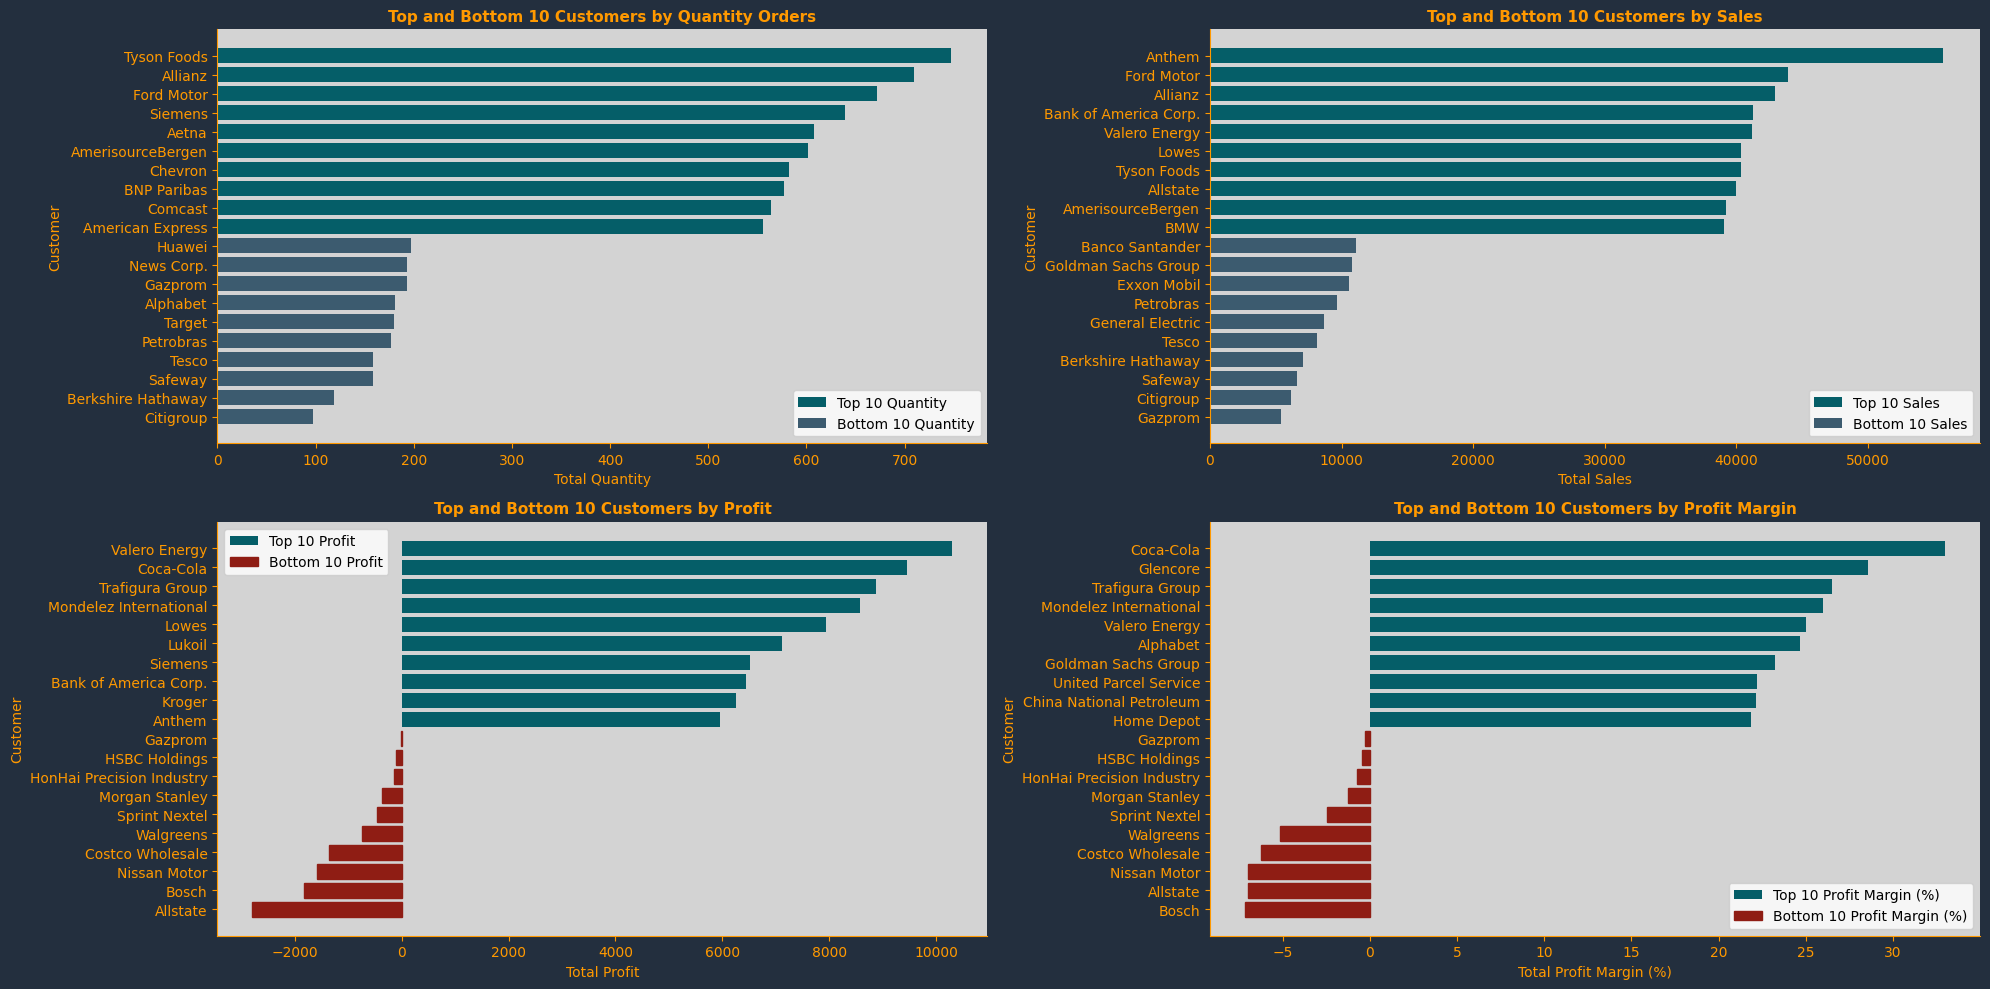

In [323]:
top_quantity_values = top_quantity['Quantity']
bot_quantity_values = bot_quantity['Quantity']
top_sales_values = top_sales['Sales']
bot_sales_values = bot_sales['Sales']
top_profit_values = top_profit['Profit']
bot_profit_values = bot_profit['Profit']
top_profit_margin_values = top_profit_margin['Profit Margin (%)']
bot_profit_margin_values = bot_profit_margin['Profit Margin (%)']

data = {
    "Quantity": (top_quantity_values, bot_quantity_values),
    "Sales": (top_sales_values, bot_sales_values),
    "Profit": (top_profit_values, bot_profit_values),
    "Profit Margin (%)": (top_profit_margin_values, bot_profit_margin_values)
}

titles = {
    "Quantity": "Top and Bottom 10 Customers by Quantity Orders",
    "Sales": "Top and Bottom 10 Customers by Sales",
    "Profit": "Top and Bottom 10 Customers by Profit",
    "Profit Margin (%)": "Top and Bottom 10 Customers by Profit Margin"
}

fig, axs = plt.subplots(2, 2, figsize=(20, 10))

for i, (key, (top_values, bot_values)) in enumerate(data.items()):
    ax = axs[i // 2, i % 2]
    ax.barh(top_values.index, top_values.values, color='#055E68', label=f'Top 10 {key}')
    ax.barh(bot_values.index, bot_values.values, color='#3C5B6F', label=f'Bottom 10 {key}')
    ax.set_ylabel('Customer', color='#FF9900')
    if i % 2 != 0:
        ax.set_ylabel('')

    if key in ['Profit', 'Profit Margin (%)']:
        for j, val in enumerate(bot_values.values):
            if val < 0:
                ax.get_children()[j + len(top_values)].set_color('#8F1D14')
    
    ax.set_ylabel('Customer', color='#FF9900')
    ax.set_xlabel(f'Total {key}', color='#FF9900')
    ax.set_title(titles[key], fontsize=11, fontweight='bold', color='#FF9900')
    ax.tick_params(axis='x', colors='#FF9900')
    ax.tick_params(axis='y', colors='#FF9900')
    ax.legend()
    ax.invert_yaxis()
    ax.set_facecolor('lightgrey')
    ax.spines[['bottom','left']].set_color('#FF9900')
    ax.spines[['top','right']].set_visible(False)

fig.patch.set_facecolor('#232F3E')
plt.tight_layout()
plt.show()


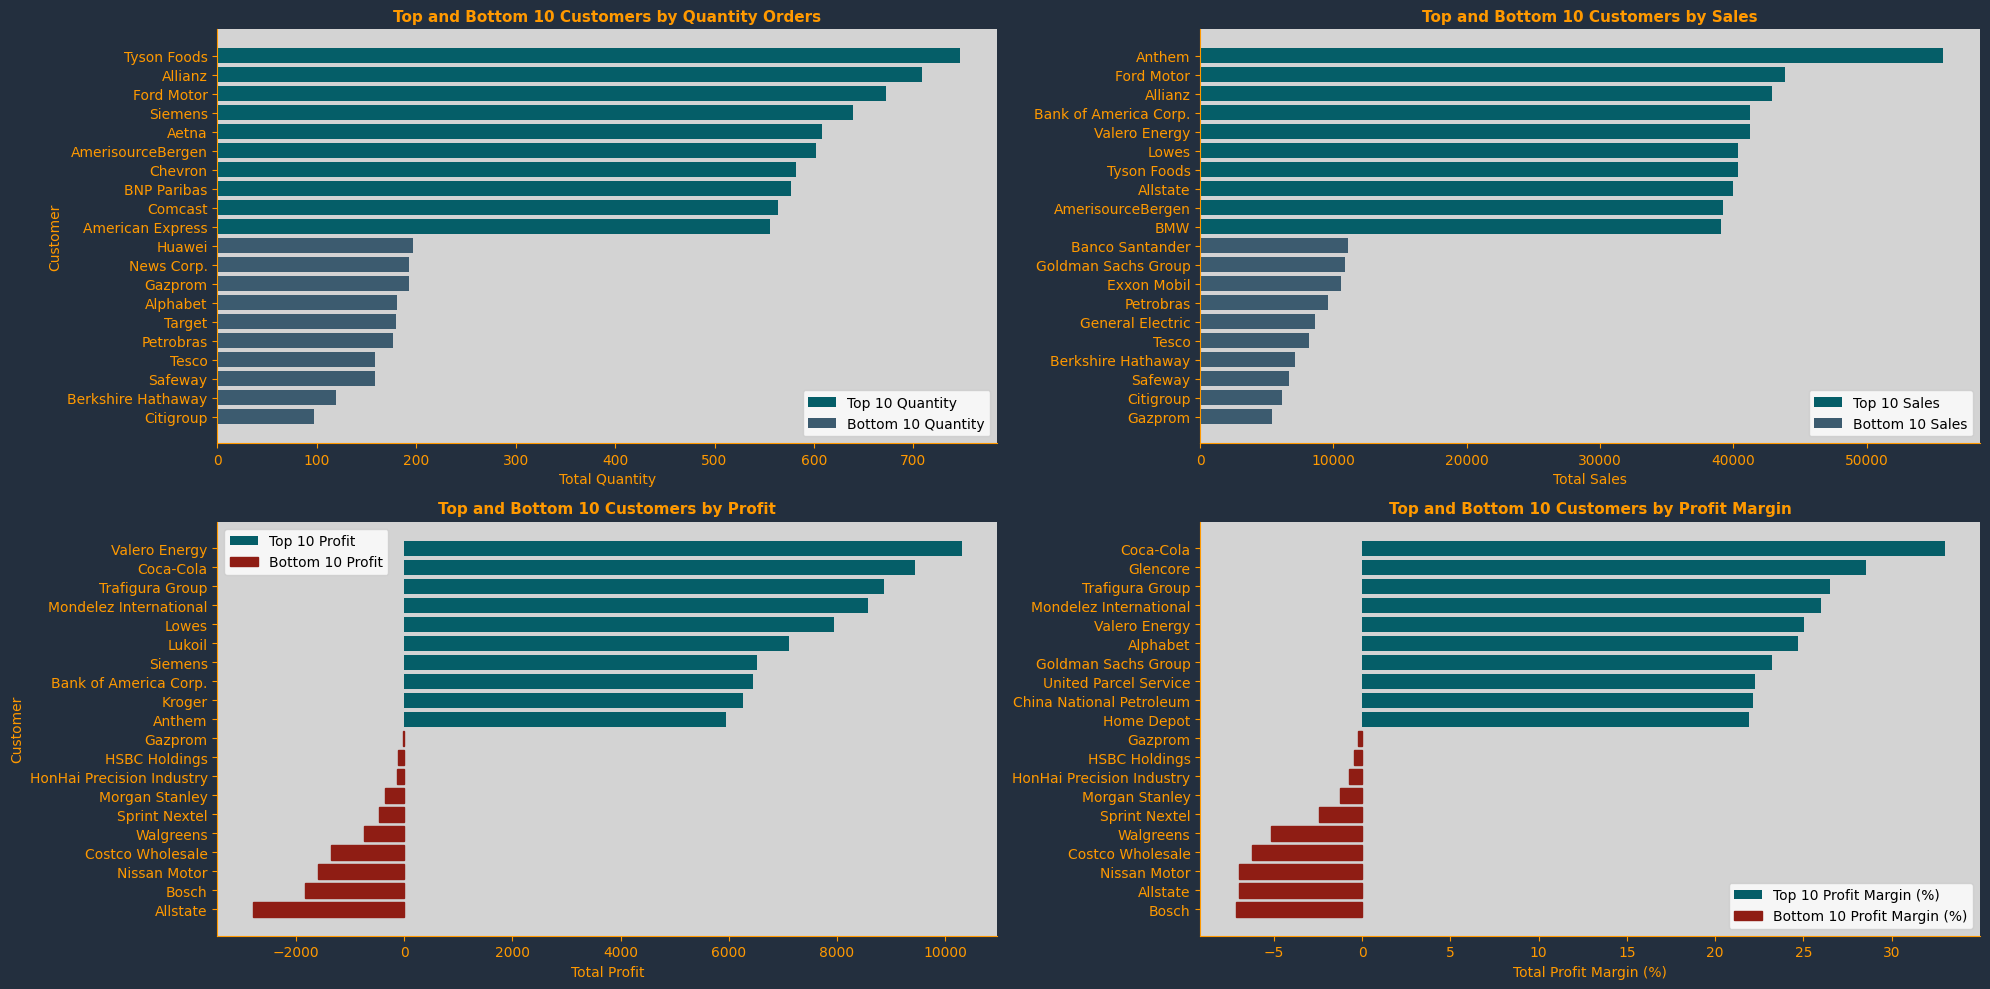

In [324]:
top_quantity_values = top_quantity['Quantity']
bot_quantity_values = bot_quantity['Quantity']
top_sales_values = top_sales['Sales']
bot_sales_values = bot_sales['Sales']
top_profit_values = top_profit['Profit']
bot_profit_values = bot_profit['Profit']
top_profit_margin_values = top_profit_margin['Profit Margin (%)']
bot_profit_margin_values = bot_profit_margin['Profit Margin (%)']

data = {
    "Quantity": (top_quantity_values, bot_quantity_values),
    "Sales": (top_sales_values, bot_sales_values),
    "Profit": (top_profit_values, bot_profit_values),
    "Profit Margin (%)": (top_profit_margin_values, bot_profit_margin_values)
}

titles = {
    "Quantity": "Top and Bottom 10 Customers by Quantity Orders",
    "Sales": "Top and Bottom 10 Customers by Sales",
    "Profit": "Top and Bottom 10 Customers by Profit",
    "Profit Margin (%)": "Top and Bottom 10 Customers by Profit Margin"
}

fig, axs = plt.subplots(2, 2, figsize=(20, 10))

for i, (key, (top_values, bot_values)) in enumerate(data.items()):
    ax = axs[i // 2, i % 2]
    ax.barh(top_values.index, top_values.values, color='#055E68', label=f'Top 10 {key}')
    ax.barh(bot_values.index, bot_values.values, color='#3C5B6F', label=f'Bottom 10 {key}')

    if key in ['Profit', 'Profit Margin (%)']:
        for j, val in enumerate(bot_values.values):
            if val < 0:
                ax.get_children()[j + len(top_values)].set_color('#8F1D14')
    
    ax.set_ylabel('Customer', color='#FF9900')
    if i % 2 != 0:
        ax.set_ylabel(None) 
    ax.set_xlabel(f'Total {key}', color='#FF9900')
    ax.set_title(titles[key], fontsize=11, fontweight='bold', color='#FF9900')
    ax.tick_params(axis='x', colors='#FF9900')
    ax.tick_params(axis='y', colors='#FF9900')
    ax.legend()
    ax.invert_yaxis()
    ax.set_facecolor('lightgrey')
    ax.spines[['bottom','left']].set_color('#FF9900')
    ax.spines[['top','right']].set_visible(False)

fig.patch.set_facecolor('#232F3E')
plt.tight_layout()
plt.show()


**INSIGHT**

- Kita dapat melihat Top dan Bottom 10 Customer berdasarkan Quantity order, Total Sales, Total Profit, dan Profit Margin dari tiap Customer. Hal ini menunjukkan pentingnya customer-customer ini dalam kontribusi pendapatan perusahaan.
- Grafik ini menunjukkan Customer mana yang memberikan profit tertinggi. Meskipun ada kemungkinan Customer dengan penjualan tinggi tidak selalu memberikan profit yang sebanding.
- Dengan melihat grafik ini, perusahaan dapat mengidentifikasi customer-customer yang paling berharga dan berpotensi untuk fokus pada layanan dan strategi retensi yang lebih intensif.
- `Tyler Foods` merupakan customer dengan jumlah pembelian (quantity) tertinggi, yaitu sebanyak 747 unit.
- `Anthem` merupakan customer yang memberikan kontribusi penjualan terbesar ($55,719.21) dari semua transaksi dan profit yang dihasilkan termasuk cukup menguntungkan bagi perusahaan   
- `Valero Energy` menjadi customer paling menguntungkan untuk perusahaan karena memiliki profit terbesar (+$10,308.63), walaupun total penjualannya berada di peringkat 5 ($41,220.42)
- `Coca-Cola` memiliki profit margin sebesar 32.99%, yang merupakan yang tertinggi di antara semua pelanggan. Ini menunjukkan bahwa `Coca-Cola` memiliki tingkat margin keuntungan yang tinggi dari segi penjualan
- Dari grafik diatas dapat dilihat Customer `Allstate` memiliki kondisi dimana termasuk dalam 10 penjualan terbesar, namun memiliki nilai total profit paling rendah. Hal ini perlu dievaluasi lebih lanjut mengapa Customer tersebut mengalami kerugian.

### **b. Faktor yang Mempengaruhi Kontribusi Customer yang Janggal**

>**`Allstate` Pengaruh Penjualan Besar, namun Profit negatif**

In [325]:
# Filter data untuk Customer 'Allstate' yang mengalami profit dibawah 0
allstate_profit = df[(df['Customer']=='Allstate') & (df['Profit'] < 0) & (df['Discount'] > 0.2)].sort_values(by='Order Date')
allstate_profit

,Order ID,Order Date,Order Year,Order Month,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
2357,EMEA-2020-148838,2020-03-17,2020,March,Christopher James,United Kingdom,London,EMEA,UKIR,Allstate,1003,Finance,Strategic,ContactMatcher,IW6FN1EJVT,1579.746,7,0.4,-447.5947
2358,EMEA-2020-148838,2020-03-17,2020,March,Christopher James,United Kingdom,London,EMEA,UKIR,Allstate,1003,Finance,Strategic,ContactMatcher,TWZTBPXDNH,1071.576,4,0.4,-553.6476
2359,EMEA-2020-148838,2020-03-17,2020,March,Christopher James,United Kingdom,London,EMEA,UKIR,Allstate,1003,Finance,Strategic,ContactMatcher,4TCGLGVZ9J,613.908,3,0.4,-122.7816
6047,EMEA-2021-105571,2021-11-07,2021,November,Christopher James,Germany,Hamburg,EMEA,EU-WEST,Allstate,1003,Finance,Strategic,ContactMatcher,H6561VP1CC,16.146,9,0.7,-12.9168
6048,EMEA-2021-105571,2021-11-07,2021,November,Christopher James,Germany,Hamburg,EMEA,EU-WEST,Allstate,1003,Finance,Strategic,ContactMatcher,OSRDYOKE2I,1345.485,5,0.7,-1031.5385
2427,APJ-2022-169922,2022-06-12,2022,June,Jonathan Clark,Japan,Hyogo,APJ,JAPN,Allstate,1003,Finance,Strategic,ContactMatcher,8ZBGP7V9OR,1.344,4,0.8,-2.1504
2428,APJ-2022-169922,2022-06-12,2022,June,Jonathan Clark,Japan,Hyogo,APJ,JAPN,Allstate,1003,Finance,Strategic,ContactMatcher,W07H6BETPP,8.272,4,0.8,-13.6488
2429,APJ-2022-169922,2022-06-12,2022,June,Jonathan Clark,Japan,Hyogo,APJ,JAPN,Allstate,1003,Finance,Strategic,SaaS Connector Pack,TKODOO4ZZB,12.544,7,0.6,-9.0944
4664,EMEA-2022-116232,2022-09-23,2022,September,Adrian Clarkson,Germany,Dresden,EMEA,EU-WEST,Allstate,1003,Finance,SMB,ContactMatcher,D7NOR8ZUW8,7.506,9,0.7,-6.0048
8211,APJ-2022-116337,2022-11-08,2022,November,Joan Dickens,Japan,Aichi,APJ,JAPN,Allstate,1003,Finance,SMB,SaaS Connector Pack,A9QH1LOUNW,44.460,5,0.6,-17.7840


**INSIGHT**

Berdasarkan tinjauan lebih lanjut mengenai data transaksi dari customer 'Allstate' didapatkan asumsi yang mungkin menyebabkan kerugian:

- Pada tanggal '2022-11-26' terjadi suatu insiden atau transaksi yang tidak terkontrol, karna pada saat itu terjadi transaksi yang menghasilkan penjualan terbesar dan kerugian terbesar dari seluruh transaksi, yaitu untuk nilai penjualan $4499.985 dan nilai profit -$6599.9780
- Diskon yang diberikan kepada customer pada tanggal tersebut diatas titik optimal (70%) dan pada saat itu Customer `Allstate` melakukan banyak pembelian produk
- Strategi penetapan harga yang tidak efektif menyebabkan ketidaksesuaian dengan harga jual dan keuntungan yang didapat

## **3.4 `Bagaimana kinerja produk terhadap penjualan antar wilayah geografis?`**

### **a. Identifikasi Kinerja Produk terhadap Profitabilitas Perusahaan berdasarkan Wilayah Geografis**

> Kinerja Produk (Global)

In [326]:
product_quantity = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
product_sales = df.groupby('Product')['Sales'].sum().round(2).sort_values(ascending=False)
product_profit = df.groupby('Product')['Profit'].sum().round(2).sort_values(ascending=False)
product_profitmargin = ((product_profit / product_sales) * 100).round(2).sort_values(ascending=False)

contribution = pd.DataFrame({
    'Total Quantity': product_quantity,
    'Sales': product_sales,
    'Profit': product_profit,
    'Profit Margin (%)': product_profitmargin
})

contribution

,Total Quantity,Sales,Profit,Profit Margin (%)
Product,,,,
Alchemy,234,149528.03,55617.82,37.20
Big Ol Database,440,189238.63,3384.76,1.79
ChatBot Plugin,3000,27118.79,6527.79,24.07
ContactMatcher,7215,410378.26,12496.28,3.05
Data Smasher,2976,167380.32,41936.64,25.05
FinanceHub,3756,340935.42,32136.42,9.43
Marketing Suite,868,114880.00,-3472.56,-3.02
Marketing Suite - Gold,3158,223843.61,21278.83,9.51
OneView,1729,107532.16,18138.01,16.87


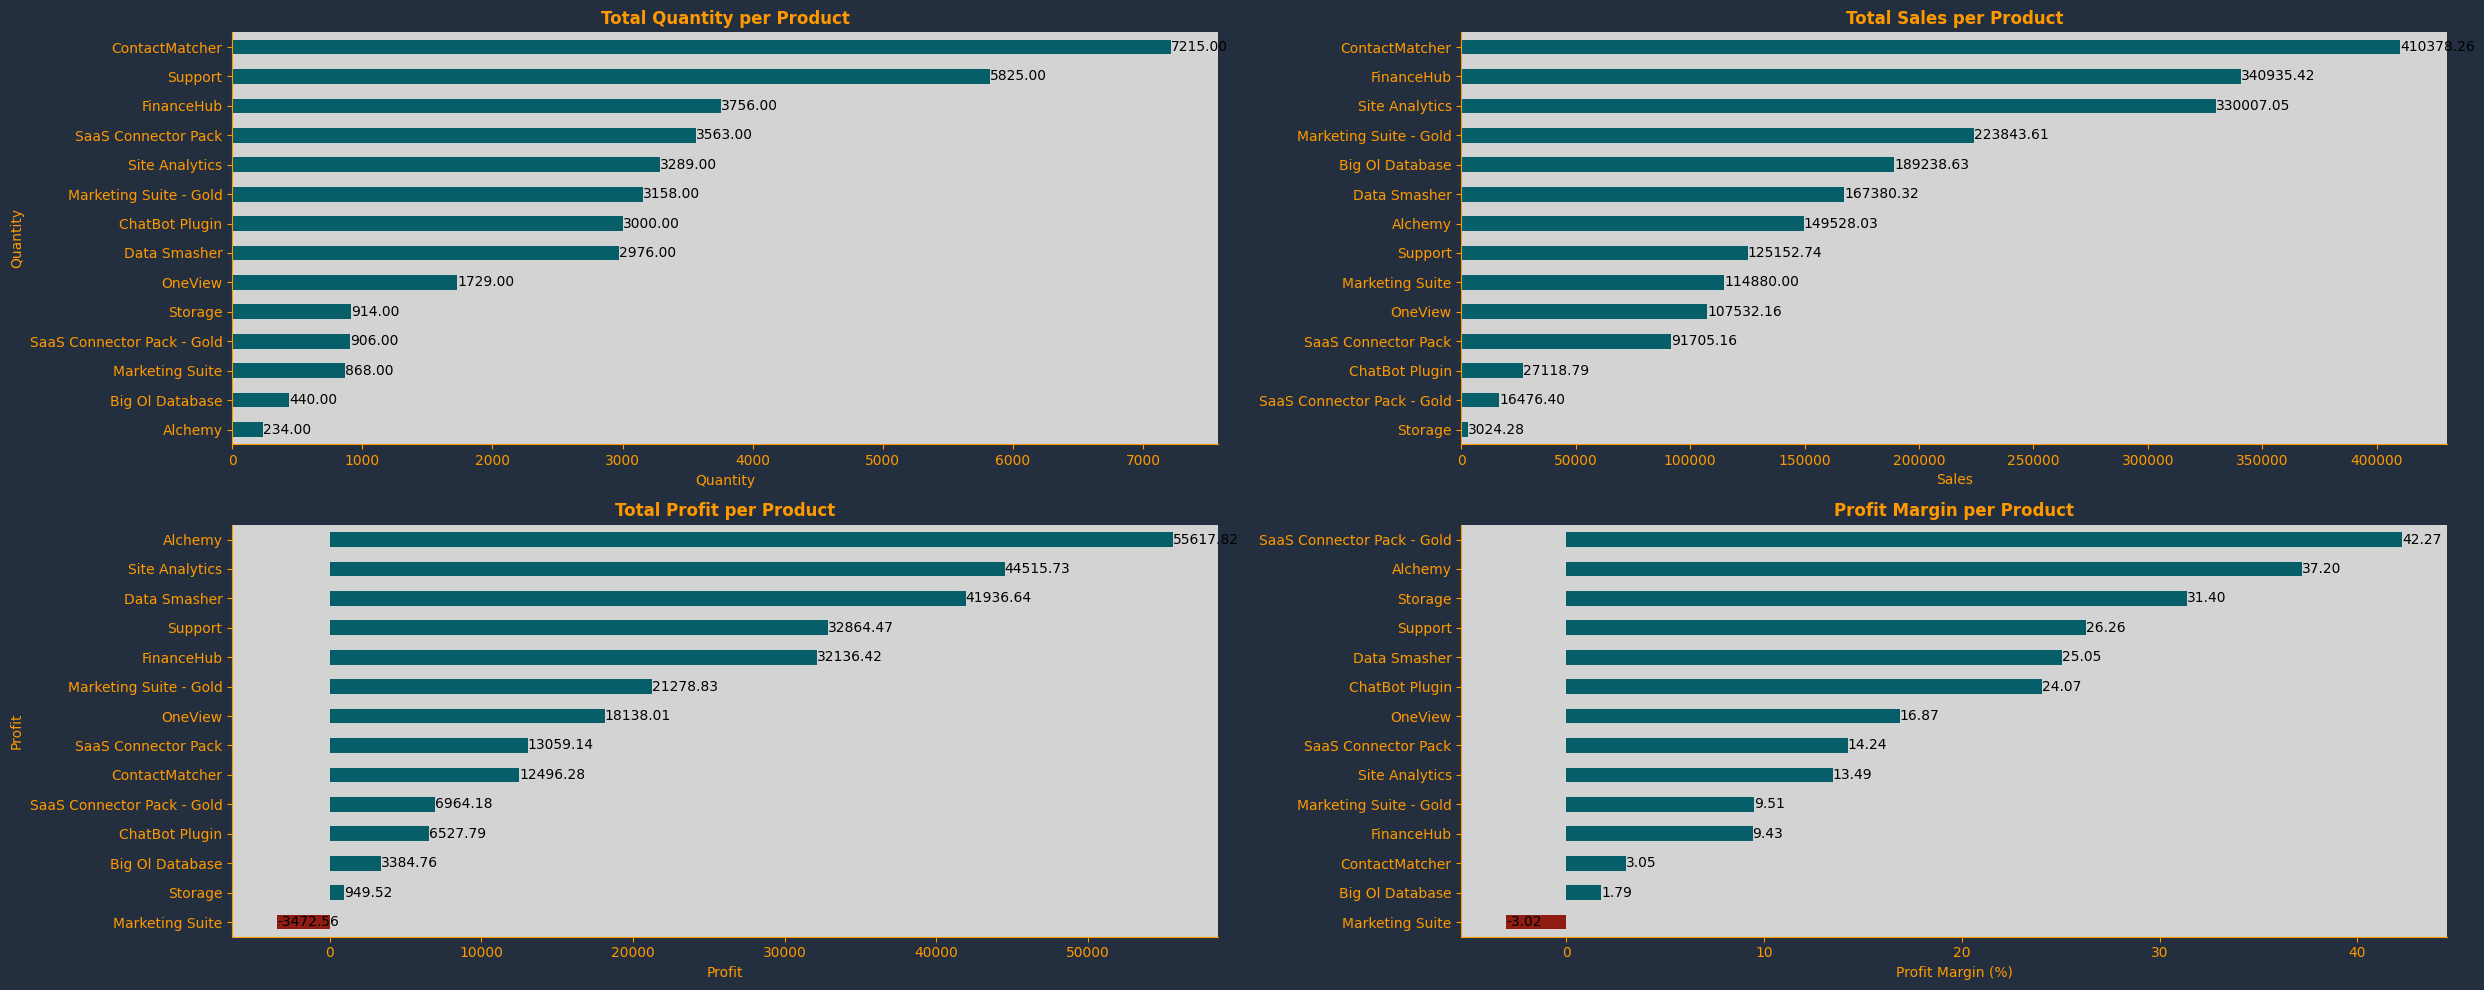

In [327]:
plots = [
    (product_quantity, 'Total Quantity per Product', 'Quantity'),
    (product_sales, 'Total Sales per Product', 'Sales'),
    (product_profit, 'Total Profit per Product', 'Profit'),
    (product_profitmargin, 'Profit Margin per Product', 'Profit Margin (%)')
]

plot_barh(plots, figsize=(25, 10))

**INSIGHT**

Dari hasil kontribusi yang ditampilkan, menunjukan bahwa:

**Top 3 Quantity Sales:**                                                               
- Produk `ContactMatcher`: 7215.                                                        
- Produk `Support` : 5825.                                                                          
- Produk `FinanceHub`: 3756.

**Top 3 Sales:**
- Produk `ContactMatcher` menyumbang $410,378
- Produk `FinanceHub` menyumbang $340,935
- Produk `Site Analytics` menyumbang $330,007

**Top 3 Profit:**
- Produk `Alchemy` memberikan keuntungan sebesar $55,617 dari total penjualan.
- Produk `Site Analytics` memberikan keuntungan sebesar $44,515 dari total penjualan.
- Produk `Data Smasher` memberikan keuntungan sebesar $41,936 dari total penjualan.

**Top 3 Profit Margin**
- Produk `SaaS Connector Pack - Gold` (42.27%) 
- Produk `Alchemy` (37.20%)
- Produk `Storage` (31.40%)

**INSIGHT**

- Produk ContactMatcher adalah produk dengan jumlah quantity terjual terbanyak (7215). Hal ini menunjukkan bahwa produk ContactMatcher memiliki tingkat permintaan yang tinggi dari Customer.
- Meskipun ContactMatcher memiliki jumlah order terbanyak. Ini menunjukkan bahwa ContactMatcher memiliki nilai penjualan yang tinggi, dikarenakan jumlah Quantity/Order pada produk tersebut sangat besar.
- Sebagian besar produk memiliki profit margin di atas 10%, yang menunjukkan bahwa secara keseluruhan, produk-produk tersebut cukup efisien dalam menghasilkan keuntungan relatif terhadap penjualannya.
- Namun, Marketing Suite menjadi satu-satunya produk yang memiliki nilai profit margin negatif (-3.02%), sedangkan kontribusi penjualannya bernilai positif. Hal ini menunjukkan bahwa ada produk-produk tertentu yang mungkin perlu dievaluasi lebih lanjut untuk meningkatkan efisiensi dan profitabilitasnya.

> Kontribusi Region terhadap Profitabilitas Perusahaan

In [328]:
region_sales_profit = df.groupby('Region').agg({'Quantity': sum, 'Sales': 'sum', 'Profit': 'sum'}).round(2)

region_sales_profit['Profit Margin'] = ((region_sales_profit['Profit'] / region_sales_profit['Sales']) * 100).round(2)

display(region_sales_profit)

,Quantity,Sales,Profit,Profit Margin
Region,,,,
AMER,13879,837849.60,127426.99,15.21
APJ,7961,415464.24,11513.99,2.77
EMEA,16033,1043887.02,147456.05,14.13


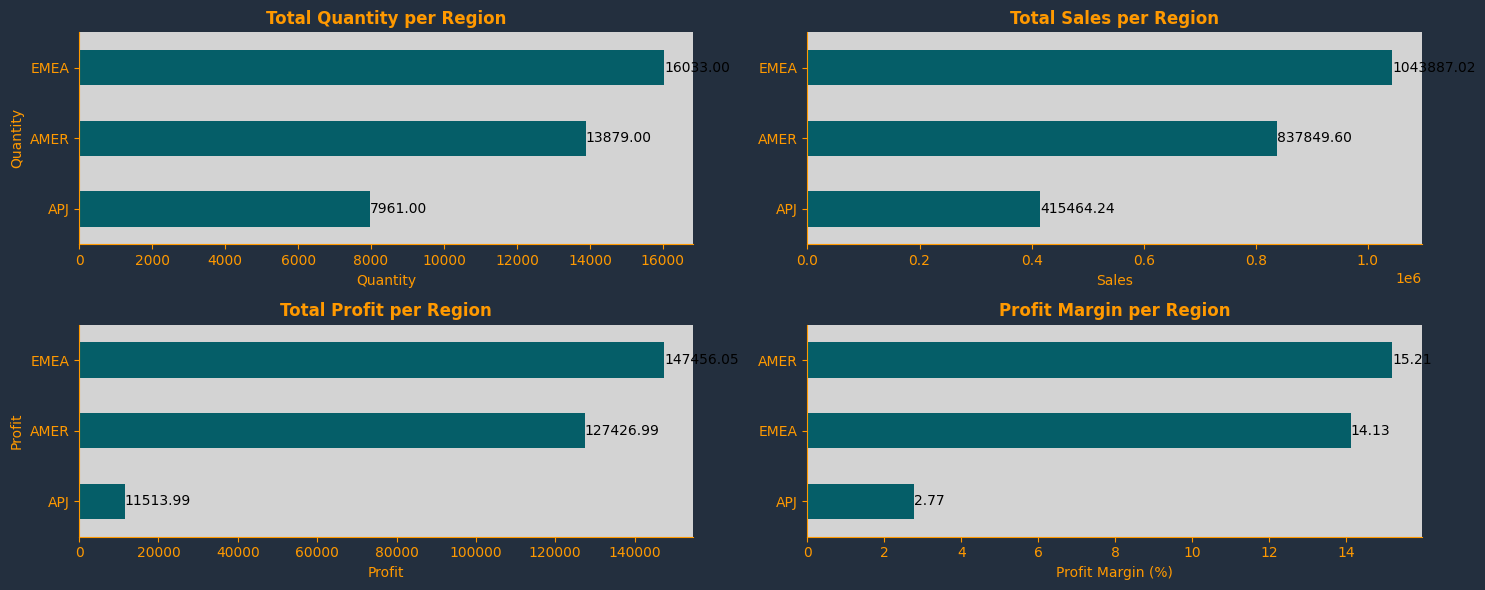

In [329]:
region_quantity = df.groupby('Region')['Quantity'].sum().sort_values(ascending=False)
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
region_profitmargin = ((region_profit / region_sales)*100).round(2).sort_values(ascending=False)

plots = [
    (region_quantity, 'Total Quantity per Region', 'Quantity'),
    (region_sales, 'Total Sales per Region', 'Sales'),
    (region_profit, 'Total Profit per Region', 'Profit'),
    (region_profitmargin, 'Profit Margin per Region', 'Profit Margin (%)')
]

plot_barh(plots, figsize=(15, 6))

**INSIGHT**

1. **`AMER` (Amerika)**:
    - Meskipun memiliki jumlah penjualan tertinggi, dengan total penjualan mencapai $837,849.60, AMER menunjukkan profit margin yang cukup rendah, hanya sebesar 15.21%.
    - Hal ini menunjukkan bahwa meskipun volume penjualan tinggi, efisiensi operasional atau strategi harga mungkin perlu diperiksa lebih lanjut untuk meningkatkan profitabilitas.

2. **`APJ` (Asia Pasifik dan Jepang)**:
    - `APJ` memiliki profit margin yang sangat rendah, hanya sebesar 2.77%, meskipun penjualan mencapai $415,464.24.
    - Hal ini menunjukkan bahwa ada potensi untuk peningkatan efisiensi operasional dan penyesuaian strategi harga agar lebih sesuai dengan pasar di wilayah tersebut.

3. **`EMEA` (Eropa, Timur Tengah, dan Afrika)**:
    - `EMEA` menunjukkan profit margin yang relatif sehat, sebesar 14.13%, dengan total penjualan mencapai $1,043,887.02.
    - Meskipun demikian, ada potensi untuk terus meningkatkan profitabilitas dengan mengoptimalkan efisiensi operasional dan strategi harga.

    Dengan demikian, analisis menunjukkan bahwa meskipun wilayah perusahaan memiliki penjualan tertinggi region `AMER`, perusahaan masih perlu memperbaiki profit margin di wilayah tersebut. Di sisi lain, penjualan di wilayah `APJ` membutuhkan perhatian khusus untuk meningkatkan profitabilitasnya, sementara region `EMEA` menunjukkan kontribusi yang sangat baik.

**Kinerja Produk berdasarkan Region**

In [330]:
product_per_region = df.groupby(['Region', 'Product']).agg({'Quantity':'sum','Sales': 'sum', 'Profit': 'sum'}).round(2)
product_per_region['Profit Margin (%)'] = ((product_per_region['Profit'] / product_per_region['Sales']) * 100).round(2)
top3qty_region = product_per_region.groupby('Region', group_keys=False).apply(lambda x: x.nlargest(3, 'Quantity'))
top3profmarg_region = product_per_region.groupby('Region', group_keys=False).apply(lambda x: x.nlargest(3, 'Profit Margin (%)'))

qty = top3qty_region['Quantity'].to_frame()
profmarg = top3profmarg_region['Profit Margin (%)'].to_frame()

display(qty, profmarg)

Quantity
Region Product                 
AMER   ContactMatcher      2661
       Support             2070
       FinanceHub          1350
APJ    ContactMatcher      1540
       Support             1293
       FinanceHub           767
EMEA   ContactMatcher      3014
       Support             2462
       FinanceHub          1639

Profit Margin (%)
Region Product                                      
AMER   SaaS Connector Pack - Gold              45.37
       Alchemy                                 36.68
       Storage                                 31.00
APJ    Alchemy                                 42.67
       SaaS Connector Pack - Gold              38.67
       Storage                                 27.92
EMEA   SaaS Connector Pack - Gold              42.44
       Storage                                 33.80
       Alchemy                                 33.70

**Top 3 Most Needed per Region**
- **AMER**:	
    - `ContactMatcher`	(2661)
    - `Support` (2070)
    - `FinanceHub` (1350)
- **APJ**	
    - `ContactMatcher`(1540)
    - `Support`(1293)
    - `FinanceHub`	(767)
- **EMEA**:	
    - `ContactMatcher` (3014)
    - `Support`	(2462)
    - `FinanceHub` (1639)

**Top 3 Profit Margin per Region**
- **AMER**:
    - `SaaS Connector Pack - Gold` (42.27%) 
    - `Alchemy` (36.68%) 
    - `Storage` (31.00%) 
- **APJ**:
    - `Alchemy` (42.67%) 
    - `SaaS Connector Pack - Gold` (38.67%) 
    - `Storage` (27.92%) 
- **EMEA**:
    - `SaaS Connector Pack - Gold` (42.44%) 
    - `Storage` (33.80%) 
    - `Alchemy` (33.70%) 

**INSIGHT**

- Produk ContactMatcher, Support, dan FinanceHub menjadi produk paling diminati di setiap wilayah (AMER, APJ, dan EMEA) berdasarkan jumlah pesanan. Hal ini mungkin menunjukkan bahwa produk-produk ini memiliki permintaan yang tinggi atau memberikan manfaat yang signifikan bagi customer di wilayah tersebut.
- Produk dengan margin keuntungan tertinggi bervariasi di setiap wilayah. Namun, SaaS Connector Pack - Gold menjadi produk dengan margin keuntungan tertinggi di dua dari tiga wilayah (AMER dan EMEA), sementara Alchemy memiliki margin keuntungan tertinggi di wilayah APJ.
- Dari insight di atas, perusahaan dapat memberikan strategi pasar produk yang paling dibutuhkan per Region dengan produk yang memiliki profit margin paling menguntungkan


### **b. Faktor yang Mempengaruhi Perbedaan Keuntungan yang Didapatkan dari Produk yang Unggul dan Rugi**

>**`ContactMatcher` - Pengaruh Sales besar, namun Profit kecil**

In [331]:
contactmatcher = df[df['Product']=='ContactMatcher']
contactmatcher.describe()

,Order Date,Order Year,Sales,Quantity,Discount,Profit
count,1842,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000
mean,2022-05-04 06:39:28.729641472,2021.732899,222.789503,3.916938,0.353067,6.784084
min,2020-01-05 00:00:00,2020.000000,0.556000,1.000000,0.000000,-3701.892800
25%,2021-06-13 00:00:00,2021.000000,9.774000,2.000000,0.200000,-10.608150
50%,2022-07-16 00:00:00,2022.000000,28.787000,3.000000,0.200000,3.147600
75%,2023-05-07 00:00:00,2023.000000,140.412000,5.000000,0.700000,16.733000
max,2023-12-31 00:00:00,2023.000000,9892.740000,14.000000,0.800000,4946.370000
std,NaN,1.116414,604.821401,2.318746,0.294389,295.817440


- **Identifikasi melalui beberapa kondisi:**

In [332]:
(len(df[(df['Product']=='ContactMatcher')&(df['Profit']>0)]),
len(df[(df['Product']=='ContactMatcher')&(df['Profit']<0)]),
len(df[(df['Product']=='ContactMatcher')&(df['Discount']>0)]),
len(df[(df['Product']=='ContactMatcher')&(df['Discount']>0.2)]),
len(df[(df['Product']=='ContactMatcher')&(df['Profit']<0)&(df['Discount']>0.2)]))

(1024, 816, 1433, 789, 785)

**INSIGHT**

- Ada 1024 transaksi yang menghasilkan profit positif.
- Sebanyak 816 transaksi menghasilkan profit negatif.
- Sebanyak 1433 transaksi mendapatkan diskon.
- Dari transaksi yang mendapatkan diskon, 789 di antaranya memiliki diskon lebih dari 20%.
- Dari 816 transaksi dengan profit negatif, 785 di antaranya juga mendapatkan diskon lebih dari 20%.

    Dapat disimpulkan bahwa pemberian diskon sangat berpengaruh pada penjualan suatu produk, dari semua transaksi produk `ContactMatcher` yang mendapatkan diskon hampir didominasi dengan diskon diatas titik optimal diskon (20%) dan hal tersebut mengakibatkan 785 transaksi menghasilkan profit negatif dan dapat diartikan hanya 4 transaksi yang menghasilkan profit positif dari semua transaksi yang menggunakan diskon diatas titik optimal. 

>**`Alchemy` - Pengaruh Sales kecil, namun Profit besar**

In [333]:
alchemy = df[df['Product']=='Alchemy']
alchemy.describe()

,Order Date,Order Year,Sales,Quantity,Discount,Profit
count,68,68.000000,68.000000,68.000000,68.000000,68.000000
mean,2022-05-05 19:45:52.941176576,2021.735294,2198.941618,3.441176,0.161765,817.909190
min,2020-05-02 00:00:00,2020.000000,299.990000,1.000000,0.000000,59.998000
25%,2021-08-09 00:00:00,2021.000000,599.987500,2.000000,0.000000,164.245725
50%,2022-06-16 00:00:00,2022.000000,1099.980000,3.000000,0.200000,332.994200
75%,2023-03-26 06:00:00,2023.000000,2399.960000,5.000000,0.200000,848.736375
max,2023-12-25 00:00:00,2023.000000,17499.950000,9.000000,0.400000,8399.976000
std,NaN,1.073669,3175.665867,1.831583,0.130475,1460.921156


- **Identifikasi melalui beberapa kondisi:**

In [334]:
(len(df[(df['Product']=='Alchemy')&(df['Profit']>0)]),
len(df[(df['Product']=='Alchemy')&(df['Profit']<0)]),
len(df[(df['Product']=='Alchemy')&(df['Discount']>0)]),
len(df[(df['Product']=='Alchemy')&(df['Discount']>0.2)]),
len(df[(df['Product']=='Alchemy')&(df['Profit']<0)&(df['Discount']>0.2)]))

(68, 0, 46, 9, 0)

**INSIGHT**

- Terdapat 68 transaksi yang menghasilkan profit positif, sementara tidak ada transaksi yang menghasilkan profit negatif.
- Sebanyak 46 transaksi mendapatkan diskon.
- Dari jumlah tersebut, 9 transaksi memiliki diskon lebih dari 20% (titik optimal).
- Dari transaksi yang menggunakan diskon diatas titik optimal tidak ada transaksi yang menghasilkan profit negatif.

    Hal ini menunjukkan bahwa meskipun produk `Alchemy` memiliki sedikit transaksi, mayoritas transaksi menghasilkan profit positif tanpa adanya diskon besar, menunjukkan keberhasilan produk ini dalam menciptakan nilai positif bagi perusahaan tanpa harus mengorbankan margin keuntungan.

>**`Marketing Suite` - Pengaruh Profit negatif**

In [335]:
marksuite = df[df['Product']=='Marketing Suite']
marksuite.describe()

,Order Date,Order Year,Sales,Quantity,Discount,Profit
count,228,228.000000,228.000000,228.000000,228.000000,228.000000
mean,2022-05-04 01:34:44.210526208,2021.741228,503.859633,3.807018,0.211140,-15.230509
min,2020-01-14 00:00:00,2020.000000,35.490000,1.000000,0.000000,-1665.052200
25%,2021-08-03 00:00:00,2021.000000,190.500000,2.000000,0.000000,-42.631200
50%,2022-06-16 12:00:00,2022.000000,306.820250,3.000000,0.200000,4.133300
75%,2023-05-03 00:00:00,2023.000000,522.285000,5.000000,0.320000,40.054100
max,2023-12-31 00:00:00,2023.000000,4404.900000,13.000000,0.700000,1013.127000
std,NaN,1.090068,638.748523,2.283352,0.191913,182.034224


- **Identifikasi melalui beberapa kondisi:**

In [336]:
(len(df[(df['Product']=='Marketing Suite')&(df['Profit']>0)]),
len(df[(df['Product']=='Marketing Suite')&(df['Profit']<0)]),
len(df[(df['Product']=='Marketing Suite')&(df['Discount']>0)]),
len(df[(df['Product']=='Marketing Suite')&(df['Discount']>0.2)]),
len(df[(df['Product']=='Marketing Suite')&(df['Profit']<0)&(df['Discount']>0.2)]))

(117, 109, 168, 70, 69)

**INSIGHT**

- Terdapat 117 transaksi yang menghasilkan profit positif, sementara 109 transaksi menghasilkan profit negatif.
- Sebanyak 168 transaksi mendapatkan diskon.
- Dari jumlah tersebut, 70 transaksi memiliki diskon lebih dari 20% (titik optimal).
- Dari transaksi yang menghasilkan profit negatif, 69 di antaranya juga mendapatkan diskon lebih dari titik optimal.

    Hal ini menunjukkan bahwa meskipun produk "Marketing Suite" menghasilkan profit positif pada beberapa transaksi, namun secara keseluruhan memiliki nilai total profit yang negatif. Terdapat kebutuhan untuk meninjau ulang strategi penetapan harga dan kebijakan diskon agar dapat meningkatkan profitabilitas produk ini.

- **Analisis Tren Penjualan produk `Marketing Suite`:**

In [337]:
marketing_suite_data = df[df['Product'] == 'Marketing Suite']
monthly_sales_profit = marketing_suite_data.groupby(['Order Year', 'Order Month']).agg({'Sales': 'sum', 'Profit': 'sum'}).round(2).reset_index()
monthly_sales_profit.set_index(['Order Year', 'Order Month'], inplace=True)

sales_profit_2020 = monthly_sales_profit.loc[2020]
sales_profit_2021 = monthly_sales_profit.loc[2021]
sales_profit_2022 = monthly_sales_profit.loc[2022]
sales_profit_2023 = monthly_sales_profit.loc[2023]

sales_profit_concat = pd.concat([sales_profit_2020, sales_profit_2021, sales_profit_2022, sales_profit_2023], axis=1, keys=['2020', '2021', '2022', '2023'])
sales_profit_concat

2020              2021              2022             2023  \
               Sales  Profit     Sales   Profit    Sales  Profit    Sales   
Order Month                                                                 
January       719.39 -330.20   1804.85  -681.86  2239.54  385.50   297.92   
February      290.67    3.42    283.92    82.34   239.98   52.80  1125.72   
March        1706.45 -141.22   2625.42    -2.49  1091.86 -544.26  1722.86   
April         308.50  -18.15    875.71   -85.89  1557.77  114.65  2183.84   
May           640.63 -189.62   1916.82   182.68     0.00    0.00  3732.13   
June          759.57   -6.58    482.94  -376.69  1329.18   10.28  4873.07   
July         1487.67  266.94   2860.38  -261.54  3807.51  586.98  2136.27   
August        794.28  164.71   3804.96    -6.49   562.21 -110.63   460.09   
September    2394.47 -120.93  10685.21 -1437.22  6133.08 -274.61  3635.86   
October       617.00  -36.29   2173.77    78.39  1900.37   87.76  4079.73   
November     7263.71 -115.09   8377.34   747.16  5797.27   15.27  2122.69   
December     3054.34  176.85   2652.24  -993.61  1616.70 -111.26  3654.10   

                     
             Profit  
Order Month          
January       71.93  
February     114.86  
March         42.58  
April         -8.46  
May         -231.58  
June         308.06  
July         265.70  
August      -102.42  
September   -150.53  
October     -332.83  
November    -194.14  
December    -366.79

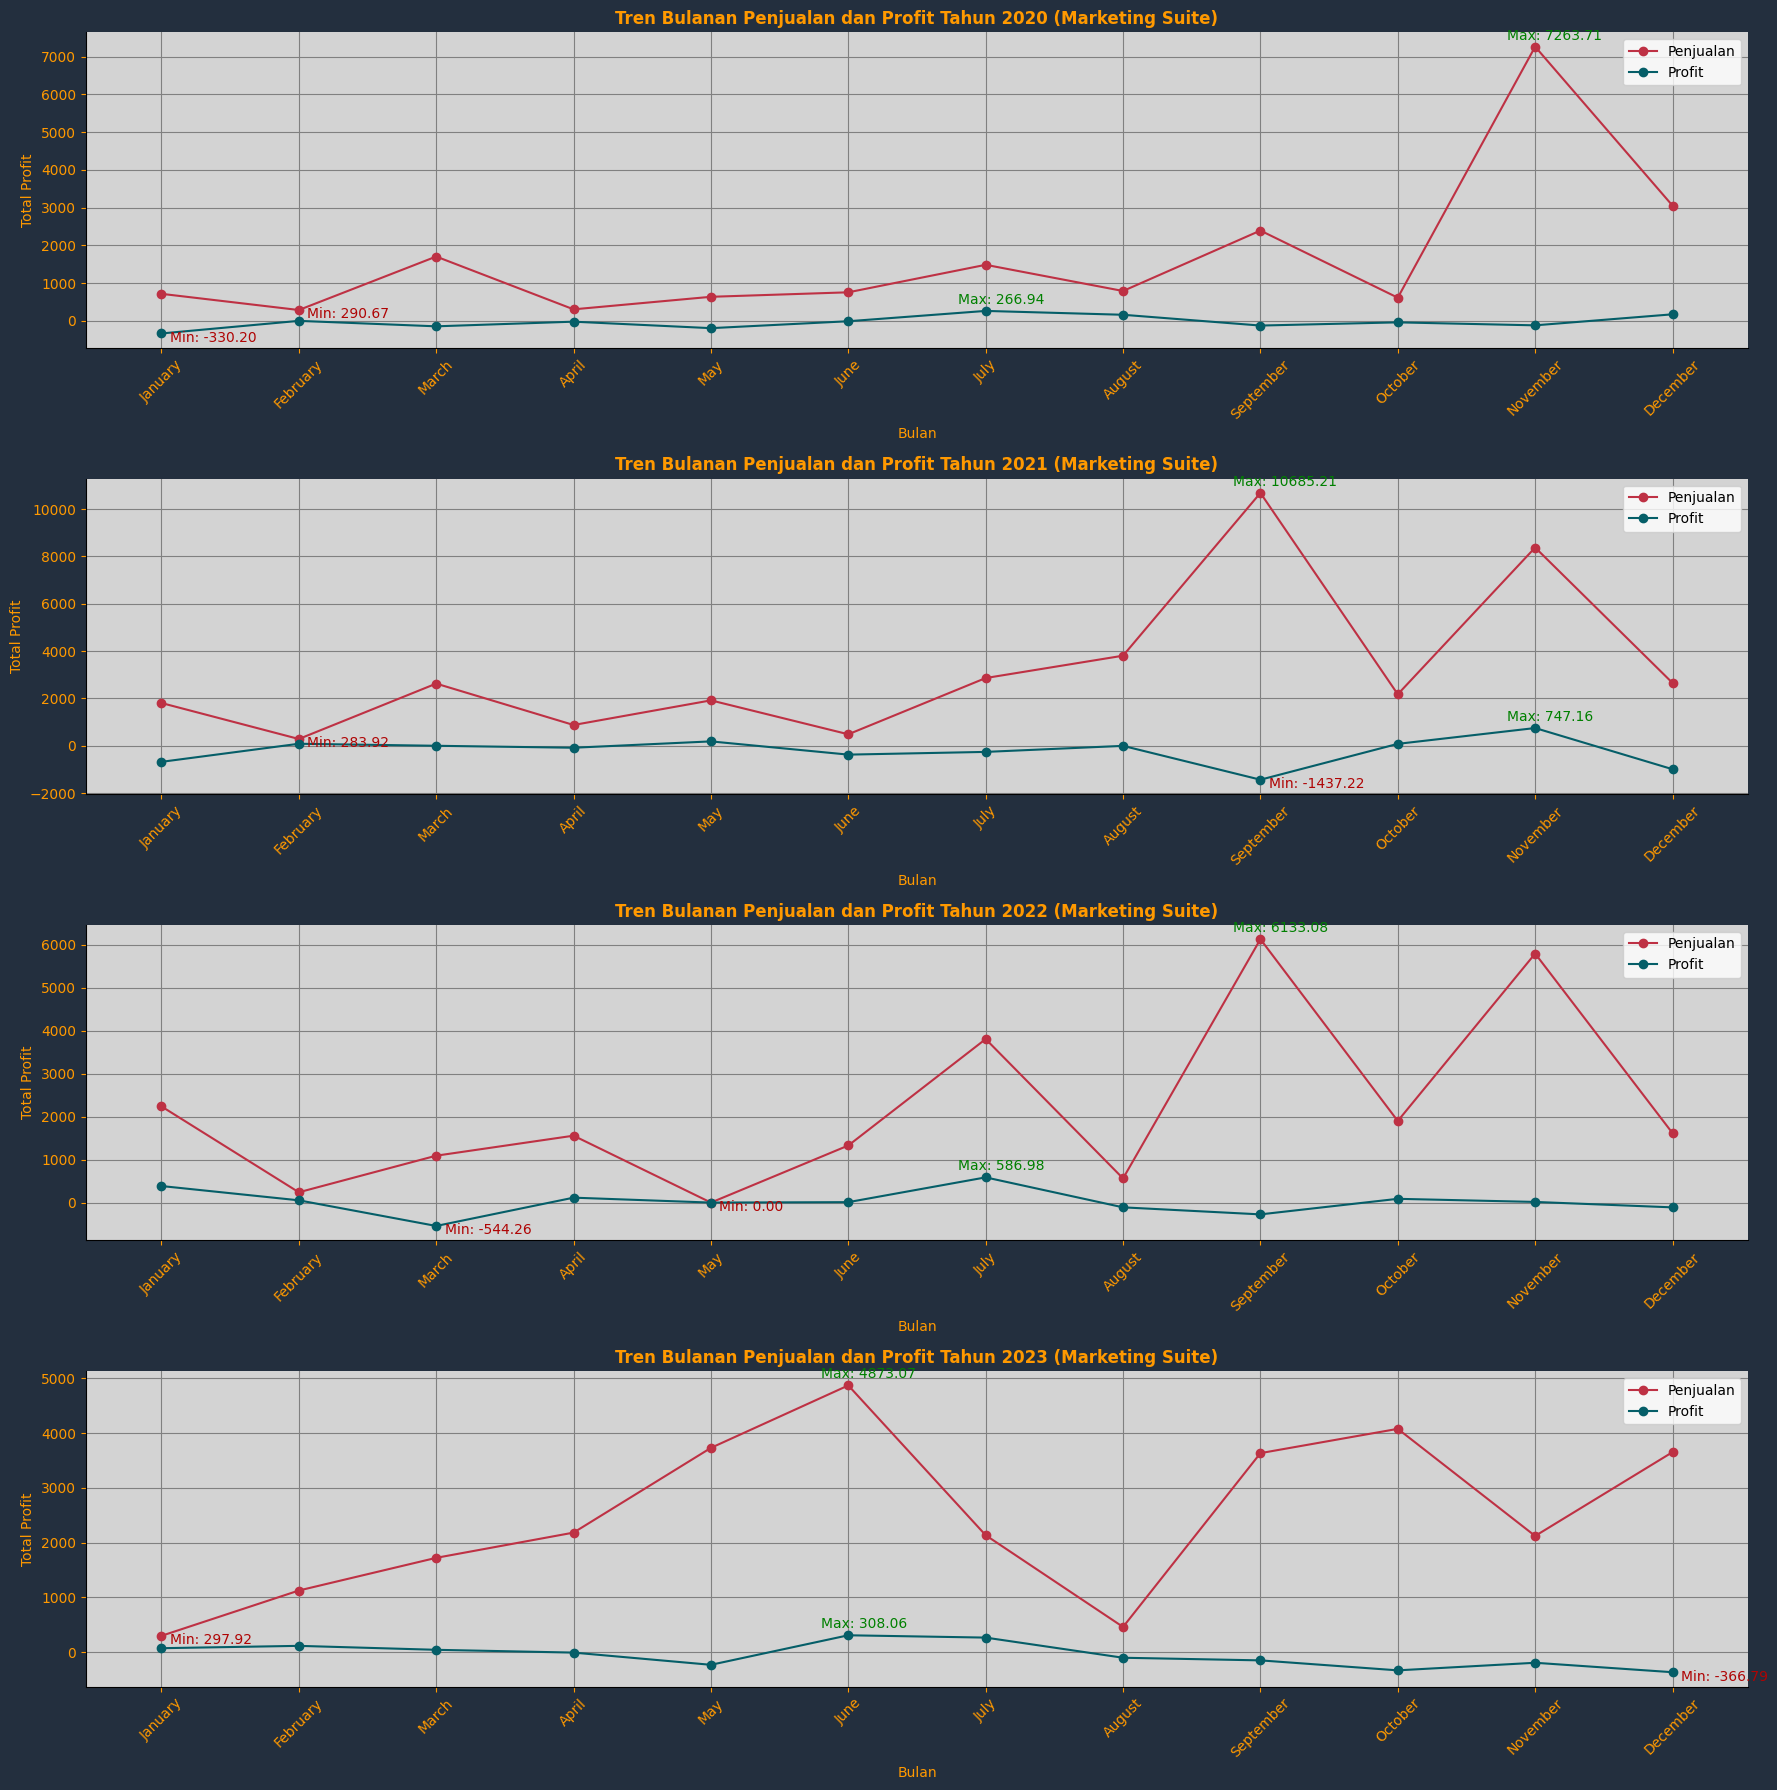

In [338]:
marketing_suite_data = df[df['Product'] == 'Marketing Suite']
yearly_monthly_marketing_suite_data = marketing_suite_data.groupby(['Order Year', 'Order Month']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(18, 18))

for i, year in enumerate(range(2020, 2024)):
    yearly_data = yearly_monthly_marketing_suite_data[yearly_monthly_marketing_suite_data['Order Year'] == year]

    axs[i].plot(yearly_data['Order Month'], yearly_data['Sales'], marker='o', color='#BE3144', label='Penjualan')
    axs[i].set_title(f'Tren Bulanan Penjualan dan Profit Tahun {year} (Marketing Suite)', fontsize=12, fontweight='bold',color ='#FF9900')
    axs[i].set_xlabel('Bulan',color ='#FF9900')
    axs[i].set_ylabel('Total Penjualan', color ='#FF9900')
    axs[i].set_xticks(yearly_data['Order Month'])
    axs[i].tick_params(axis='x', rotation=45, colors='#FF9900')
    axs[i].tick_params(axis='y', colors='#FF9900')
    axs[i].grid(True, color='grey')
    axs[i].legend()
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    annotate_max_min(axs[i], yearly_data, 'Order Month', 'Sales')

    axs[i].plot(yearly_data['Order Month'], yearly_data['Profit'], marker='o', color='#055E68', label='Profit')
    axs[i].set_xlabel('Bulan',color ='#FF9900')
    axs[i].set_ylabel('Total Profit',color ='#FF9900')
    axs[i].tick_params(axis='x', rotation=45, colors='#FF9900')
    axs[i].tick_params(axis='y', colors='#FF9900')
    axs[i].legend()
    axs[i].set_facecolor('lightgrey')
    annotate_max_min(axs[i], yearly_data, 'Order Month', 'Profit')

fig.patch.set_facecolor('#232F3E')
plt.tight_layout()
plt.show()

**INSIGHT**
- Terdapat fluktuasi yang signifikan dalam penjualan dan profit dari tahun ke tahun serta bulan ke bulan.
- Penjualan dan profit pada bulan-bulan tertentu bisa sangat tinggi, sementara pada bulan lainnya bisa merosot atau bahkan negatif.
- Tingginya penggunaan diskon atau promosi pada beberapa bulan bisa mengakibatkan penjualan naik namun profit menurun
- Pada saat September 2021 profit dari Marketing Suite turun drastis di angka -$1437, walaupun penjualan saat itu sangat tinggi nilainya di angka $10,685,
- Pada bulan Mei 2022, produk Marketing Suite tidak tersedia di penjualan SaaS sehingga tidak menghasilkan penjualan dan profit pada bulan tersebut

## **4.1 `Conclusions`**

Berdasarkan serangkaian analisis yang telah dilakukan, terdapat beberapa insight penting yang dapat membantu perusahaan SaaS dalam pengambilan keputusan strategis:

1. **Pemberian Diskon dan Profitabilitas:**
   - Meskipun jumlah transaksi dengan diskon lebih tinggi, profitabilitas per transaksi tanpa diskon cenderung lebih tinggi, dengan median profit yang jauh lebih tinggi dari transaksi tanpa diskon. Ini menunjukkan pentingnya mempertimbangkan dampak diskon terhadap profitabilitas perusahaan.
   - Terdapat titik optimal untuk pemberian diskon untuk setiap transaksi yaitu di angka diskon >= 20% agar profitabilitas perusahaan tetap terjaga (positif) 
   - Diskon diatas titik optimal (>20%) dapat berdampak negatif pada profitabilitas perusahaan, sehingga perusahaan perlu hati-hati dalam menentukan strategi diskon agar tidak mengurangi keuntungan secara signifikan.

2. **Pola Penjualan dan Profit:**
   - Terdapat fluktuasi bulanan dalam penjualan dan profit, dengan peningkatan yang konsisten dari tahun ke tahun.
   - Terdapat pola Peak Season setiap bulan Maret, September, November, dan Desember 
   - Korelasi antara penjualan dan profit menunjukkan bahwa peningkatan penjualan tidak selalu diikuti oleh peningkatan profit secara proporsional, yang menunjukkan perlunya evaluasi lebih lanjut terhadap efisiensi operasional dan strategi harga.

3. **Kontribusi Customer:**
   - Identifikasi Top dan Bottom 10 Customer berdasarkan kontribusi mereka terhadap penjualan, profit, dan profit margin menyoroti pentingnya fokus pada customer yang paling berharga dan berpotensi.
   - Produk dengan margin keuntungan tertinggi perlu diperhatikan lebih lanjut, sementara produk dengan margin negatif perlu dievaluasi untuk meningkatkan efisiensi dan profitabilitasnya.
   - Terjadi suatu insiden pada transaksi dengan Customer `Allstate` yang mengakibatkan profit perusahaan menurun drastis

4. **Kinerja Produk**
   - Kinerja penjualan produk-produk yang dijualkan oleh perusahaan cukup efisien dalam menghasilkan keuntungan relatif positif terhadap penjualannya, dikarenakan sebagian besar produk memiliki profit margin di atas 10%,
   - Produk `ContactMatcher`, `Support`, dan `FinanceHub` menjadi produk paling diminati di setiap wilayah (AMER, APJ, dan EMEA) berdasarkan jumlah pesanan. Hal ini mungkin menunjukkan bahwa produk-produk ini memiliki permintaan yang tinggi atau memberikan manfaat yang signifikan bagi customer di wilayah tersebut.
   - Produk dengan margin keuntungan tertinggi bervariasi di setiap wilayah. Namun, `SaaS Connector Pack - Gold` menjadi produk dengan margin keuntungan tertinggi di dua dari tiga wilayah (AMER dan EMEA), sementara `Alchemy` memiliki margin keuntungan tertinggi di wilayah APJ.
   - Marketing Suite menjadi satu-satunya produk yang memiliki nilai profit margin negatif (-3.02%), dikarenakan strategi penjualan yang kurang efisien

## **4.2 `Recommendation`**

Berikut merupakan rekomendasi yang dapat diberikan kepada perusahaan:
- Perusahaan dapat memberikan diskon kepada customer sesuai titik optimal (<= 20%) agar profitabilitas tetap terjaga dengan baik,
- Memberikan promo pada saat bulan Maret, September, November, dan Desember (Peak season), 
- Prioritaskan customer yang memberikan kontribusi signifikan terhadap penjualan dan profit, dan lakukan evaluasi mendalam terhadap produk-produk dengan margin negatif untuk meningkatkan efisiensi dan profitabilitasnya.
- Memperhatikan pemberian diskon di setiap transaksi, agar tidak terjadi ketidakseimbangan antara penjualan dan profit yang didapatkan
- Mengembangkan strategi pasar untuk produk `Marketing Suite`, dengan mengadopsi strategi pasar yang lebih terfokus dan harga yang disesuaikan dengan karakteristik pasar di setiap wilayah, dengan mempertimbangkan produk-produk yang paling diminati dan memiliki margin keuntungan tertinggi.
- Perusahaan dapat memberikan strategi pasar produk yang paling dibutuhkan per Region dengan produk yang memiliki profit margin paling menguntungkan

    Dengan memahami pola dan tren dari data yang telah dianalisis, perusahaan dapat mengoptimalkan strategi penjualan, harga, dan diskon untuk mencapai keseimbangan yang baik antara peningkatan penjualan dan profitabilitas, serta memperkuat posisi pasar di setiap wilayah.